# Laboratorio 1

In [291]:
#Instalcion de todas las librerias
import pandas as pd
import numpy as np
import sys
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


### Carga de datos

In [292]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('train_data.csv', sep=',', encoding = 'utf-8')
# Asignaci√≥n a una nueva variable de los datos leidos

Mostrando que los datos se cargan

In [293]:
data

objid          ra        dec         u         g  \
0     1237648722306924571  185.574486   0.701402  19.11034  17.62099   
1     1237648720167436418  203.801841  -0.853906  18.90957  17.62940   
2     1237648720685105352  160.034264  -0.421626  19.26340  17.67693   
3     1237648703510937836  200.807373  -0.682024  18.82022  17.77765   
4     1237648720161275992  189.792404  -1.001480  18.91391  19.05355   
...                   ...         ...        ...       ...       ...   
3995  1237648720690741273  172.826005  -0.484303  18.81890  17.89273   
3996  1237649918427267086   11.165126  13.745240  17.46665  15.96142   
3997  1237648720164684046  197.579529  -0.971573  19.45682  18.32555   
3998  1237648721206575779  124.877626  -0.048110  19.20158  17.31450   
3999  1237648720161800205  190.920230  -0.972532  17.63725  16.65544   

             r         i         z   run  camcol  field     score  clean  \
0     17.03464  16.82993  16.71711   756       5    466  0.864145      1   
1     17.01465  16.62059  16.35239   756       1    588  0.816541      1   
2     16.82551  16.42307  16.13864   756       2    295  0.870381      1   
3     17.38575  17.11128  16.93540   752       2    382  0.867801      1   
4     19.46278  19.75660  20.09613   756       1    494  0.833824      1   
...        ...       ...       ...   ...     ...    ...       ...    ...   
3995  17.54372  17.41363  17.31821   756       2    381  0.887803      1   
3996  15.36014  15.14572  15.04453  1035       1     38  0.844826      1   
3997  17.86916  17.57512  17.41648   756       1    546  0.819151      1   
3998  16.36573  15.91760  15.57736   756       3     60  0.894044      1   
3999  16.29970  16.14733  16.09544   756       1    502  0.845173      1   

       class      redshift    mjd      rowv      colv  
0       STAR  8.780529e-05  54140  0.002418  0.001363  
1     GALAXY  8.619995e-02  51955  0.008650  0.007056  
2     GALAXY  1.330486e-01  51913  0.003938 -0.002028  
3     GALAXY  8.636355e-02  51959  0.001839  0.001160  
4       STAR -4.090000e-08  54562  0.001929 -0.000465  
...      ...           ...    ...       ...       ...  
3995    STAR  1.521540e-04  54891  0.000675  0.000324  
3996    STAR  4.182837e-05  53242 -0.000440 -0.000301  
3997  GALAXY  8.160563e-02  51985  0.011348  0.005854  
3998  GALAXY  8.744828e-02  55888 -0.004486 -0.006072  
3999    STAR  2.131280e-04  51928  0.001372  0.000094  

[4000 rows x 18 columns]

## Entendimiento de los Datos

Antes de comenzar a analizar los datos, es fundamental identificar que datos son m√°s importantes que otros, para nuestro fin que es buscar el RedShift. El cual describe c√≥mo la luz de un objeto astron√≥mico se desplaza hacia longitudes de onda m√°s largas debido a la expansi√≥n del universo. Su correcta estimaci√≥n nos permite calcular distancias c√≥smicas y estudiar la evoluci√≥n del universo. Por esta raz√≥n, priorizamos aquellas variables que pueden influir directamente en su c√°lculo y descartamos aquellas que no aportan informaci√≥n significativa.

###  Variables Necesarias

- **ra**
  - Ubicaci√≥n del objeto en su componente de ascensi√≥n recta de coordenada celeste.
  - Es importante para referenciar la ubicaci√≥n del objeto y en algunos modelos avanzados puede aportar informaci√≥n contextual relevante.
- **dec**
  - Ubicaci√≥n del objeto en su componente de declinaci√≥n de coordenada celeste.
  - Permite ubicar correctamente el objeto en la esfera celeste y, junto con ra, es clave para contextualizar observaciones.
- **u, g, r, z, i (Magnitudes en diferentes filtros)**
  - Permiten clasificar y caracterizar los objetos en funci√≥n de su emisi√≥n de luz en distintos rangos de longitud de onda.
  - Son fundamentales para estimar redshifts fotom√©tricos si se quiere hacer una estimaci√≥n sin espectroscop√≠a.
- **class**
  - Indica si el objeto es una estrella (**STAR**), una galaxia (**GALAXY**) o un cu√°sar (**QSO**). 
  - Es relevante porque el redshift se aplica mayormente a galaxias y cu√°sares, mientras que las estrellas cercanas no presentan redshifts significativos.
- **redshift**
  - Es el valor clave de estudio, ya que representa el corrimiento al rojo del objeto.

###  Variables no necesarias
Las siguientes variables fueron descartadas por su baja relevancia en la estimaci√≥n del redshift o porque su informaci√≥n ya est√° impl√≠citamente contenida en otras variables:

- **mjd**
  - D√≠a juliano en que se registr√≥ el objeto.
  - Puede ser √∫til si se estudian variaciones en observaciones a lo largo del tiempo, pero en nuestro caso no la tomamos en cuenta, ya que es un analisis estatico.
- **run**
  - Es la cantidad de observaciones realizadas por el telescopio pero en este caso no es importante
- **camcol**
  - Dado que es un atributo t√©cnico de la instrumentaci√≥n y no del objeto en s√≠, se considera irrelevante para el modelo.
  - Columna de la c√°mara en la que se registr√≥ el objeto. Se reviso la correlacion lineal pero fue muy bajo tambien por eso se descarto esto.     
 - **field**
    - Secci√≥n de la columna de la c√°mara en la que se registr√≥ el objeto. Ya que Camcol no la tomamos importante esta tampoco para el analisis      
- **score**
  - Indica la calidad de la observaci√≥n. Es  √∫til para filtrar datos de baja calidad.
- **clean**
  - Tambi√©n puede ayudar a filtrar observaciones con problemas en la fotometr√≠a, lo usamos para eliminar datos ya que junto con Run nos da informacion.
- **rowv**
  - Velocidad horizontal (fila) del objeto en grados/d√≠a.
- **colv**
  - Velocidad vertical (columna) del objeto en grados/columna..




## Visualizaci√≥n de datos

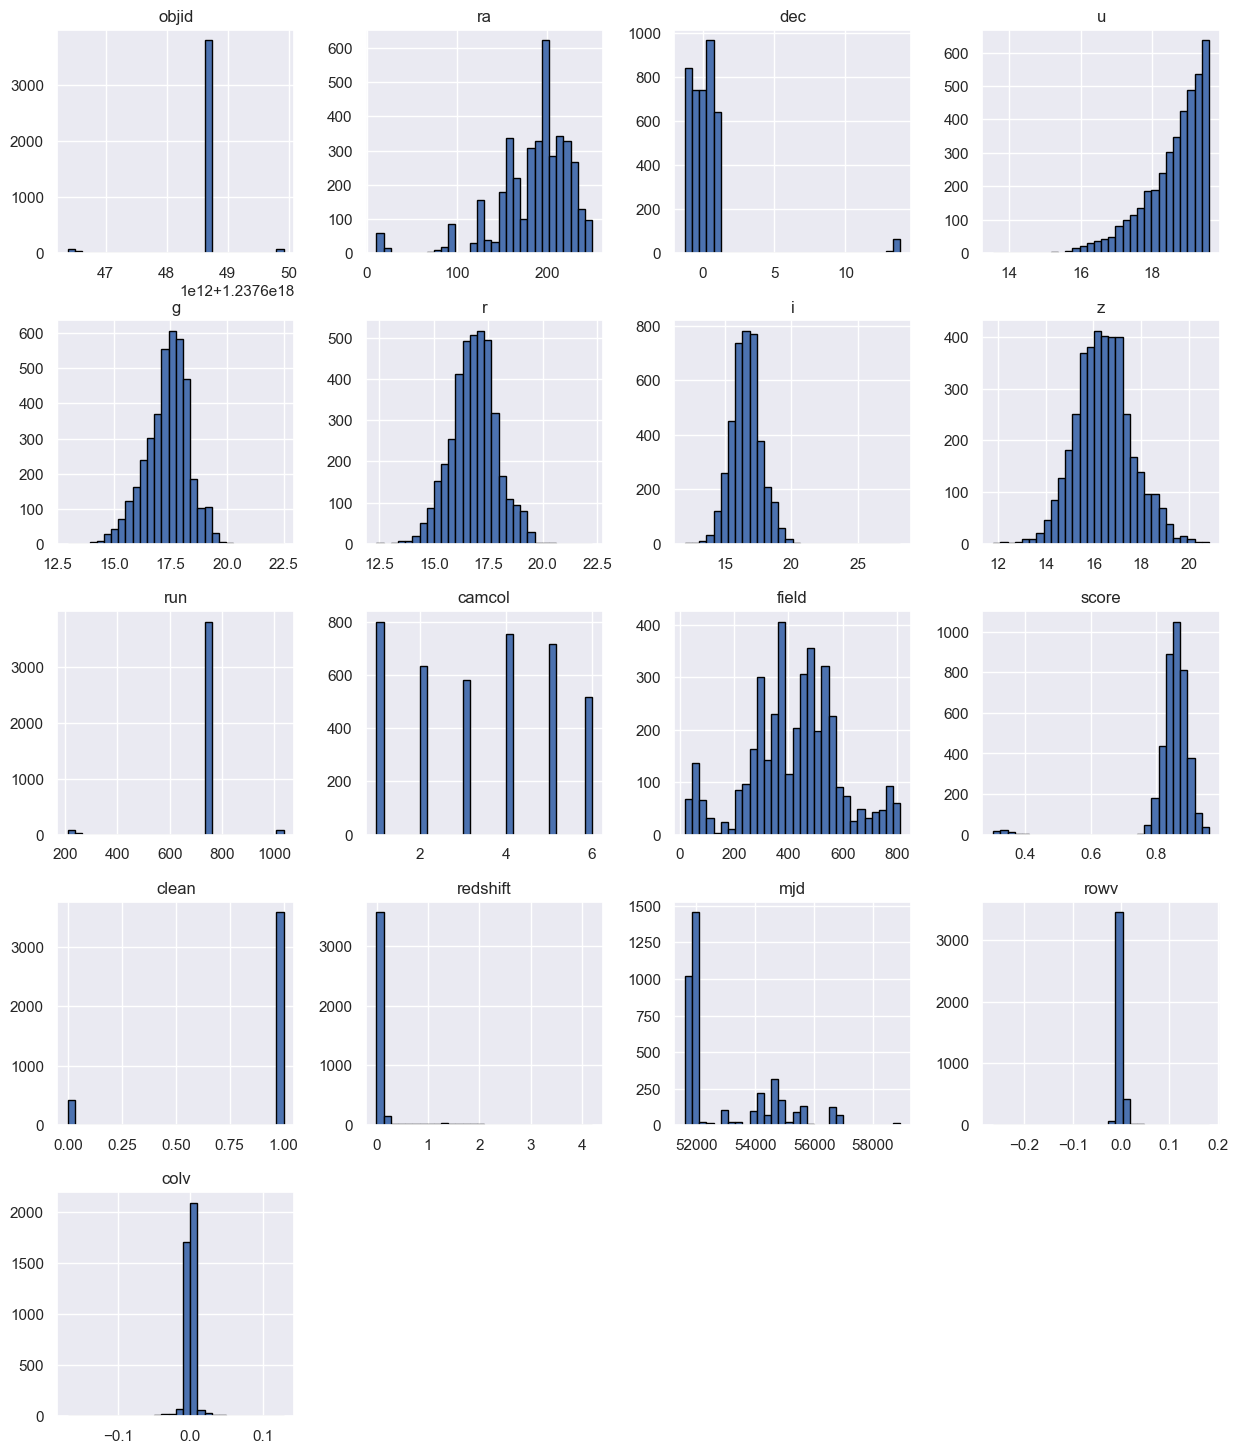

In [ ]:
data.hist(figsize=(15,18),bins=30,edgecolor="black")

In [295]:
#Entendimiento del tama√±o del data Set a ser manejado
print('Dimensiones de los datos: ', data.shape, 'El primer valor corresponde a filas y el segundo a columnas')

Dimensiones de los datos:  (4000, 18) El primer valor corresponde a filas y el segundo a columnas


In [296]:
# Visualizacion de los primeros 10 datos
display(data.head(10))

objid          ra        dec         u         g         r  \
0  1237648722306924571  185.574486  40.187398  19.11034  17.62099  17.03464   
1  1237648720167436418  203.801841 -48.925211  18.90957  17.62940  17.01465   
2  1237648720685105352  160.034264 -24.157376  19.26340  17.67693  16.82551   
3  1237648703510937836  200.807373 -39.077125  18.82022  17.77765  17.38575   
4  1237648720161275992  189.792404 -57.380593  18.91391  19.05355  19.46278   
5  1237648720132178408  123.386052 -59.902696  18.52214  17.45173  17.23112   
6  1237648720165863598  200.243728 -51.333050  18.09523  16.82764  16.18942   
7  1237648704054624442  216.256661 -12.650848  19.20765  18.73173  18.84302   
8  1237648722308890870  190.050847  39.859061  17.82951  15.90091  15.02515   
9  1237648720163963081  195.951990 -55.347995  17.76132  16.51327  15.89811   

          i         z  run  camcol  field     score  clean   class  \
0  16.82993  16.71711  756       5    466  0.864145      1    STAR   
1  16.62059  16.35239  756       1    588  0.816541      1  GALAXY   
2  16.42307  16.13864  756       2    295  0.870381      1  GALAXY   
3  17.11128  16.93540  752       2    382  0.867801      1  GALAXY   
4  19.75660  20.09613  756       1    494  0.833824      1    STAR   
5  17.16427  17.13214  756       1     50  0.851417      1    STAR   
6  15.83503  15.58671  756       1    564  0.815295      0  GALAXY   
7  18.98353  19.15128  752       3    486  0.804086      1    STAR   
8  14.61881  14.30353  756       5    496  0.822898      1  GALAXY   
9  15.53069  15.31236  756       1    535  0.811336      1  GALAXY   

       redshift    mjd      rowv      colv  
0  8.780529e-05  54140  0.002418  0.001363  
1  8.619995e-02  51955  0.008650  0.007056  
2  1.330486e-01  51913  0.003938 -0.002028  
3  8.636355e-02  51959  0.001839  0.001160  
4 -4.090000e-08  54562  0.001929 -0.000465  
5  1.190440e-05  53816 -0.002165 -0.000364  
6  4.815651e-02  51984 -0.011610  0.002361  
7 -2.234210e-04  51613 -0.002153 -0.001026  
8  4.634102e-02  51941 -0.000474 -0.001548  
9  8.944633e-02  51986  0.000894  0.001024

In [297]:
# Imprimimos los diferentes tipos de las columnas
data.dtypes

objid         int64
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
score       float64
clean         int64
class        object
redshift    float64
mjd           int64
rowv        float64
colv        float64
dtype: object

In [298]:
# Imprimir las columnas numericas
columnasNumericas= data.select_dtypes(include=['int','float']).columns
print(columnasNumericas)

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'score', 'clean', 'redshift', 'mjd', 'rowv', 'colv'],
      dtype='object')


In [299]:
data.describe( include='all')

objid           ra          dec            u            g  \
count   4.000000e+03  4000.000000  4000.000000  4000.000000  4000.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN          NaN   
mean    1.237649e+18   185.523295    14.264288    18.609049    17.363397   
std     4.244222e+11    41.689446   114.653131     0.839431     0.950964   
min     1.237646e+18    10.469743   -71.778038    13.551780    12.974870   
25%     1.237649e+18   162.474666   -36.200842    18.170375    16.796110   
50%     1.237649e+18   195.815451     3.055942    18.843745    17.472525   
75%     1.237649e+18   214.348425    33.999065    19.261563    17.997818   
max     1.237650e+18   249.758313   793.776320    19.599750    22.497450   

                  r            i            z          run      camcol  \
count   4000.000000  4000.000000  4000.000000  4000.000000  4000.00000   
unique          NaN          NaN          NaN          NaN         NaN   
top             NaN          NaN          NaN          NaN         NaN   
freq            NaN          NaN          NaN          NaN         NaN   
mean      16.839856    16.597712    16.439392   743.829000     3.37625   
std        1.055343     1.141252     1.190502    98.865936     1.69909   
min       12.362850    12.010790    11.799530   211.000000     1.00000   
25%       16.190785    15.870782    15.628205   752.000000     2.00000   
50%       16.850835    16.571195    16.402665   756.000000     3.00000   
75%       17.506640    17.258833    17.147037   756.000000     5.00000   
max       22.265960    28.179630    20.847690  1035.000000     6.00000   

              field        score        clean   class     redshift  \
count   4000.000000  4000.000000  4000.000000    4000  4000.000000   
unique          NaN          NaN          NaN       6          NaN   
top             NaN          NaN          NaN  GALAXY          NaN   
freq            NaN          NaN          NaN    1857          NaN   
mean     419.602000     0.851765     0.895500     NaN     0.134015   
std      167.162063     0.071311     0.305946     NaN     0.379742   
min       19.000000     0.301912     0.000000     NaN    -0.003322   
25%      311.000000     0.836866     1.000000     NaN     0.000106   
50%      434.000000     0.860675     1.000000     NaN     0.032038   
75%      527.000000     0.879834     1.000000     NaN     0.086479   
max      812.000000     0.961145     1.000000     NaN     4.192597   

                 mjd         rowv         colv  
count    4000.000000  4000.000000  4000.000000  
unique           NaN          NaN          NaN  
top              NaN          NaN          NaN  
freq             NaN          NaN          NaN  
mean    52957.124750     0.000218    -0.000090  
std      1601.148131     0.008794     0.007457  
min     51608.000000    -0.264516    -0.168807  
25%     51821.000000    -0.001212    -0.001609  
50%     51986.000000     0.000322     0.000125  
75%     54468.000000     0.001698     0.001672  
max     58932.000000     0.181871     0.128814

### Analisis de la calidad de los datos

##### Completitud

In [300]:
data.isnull().sum()
data.isna().sum()

objid       0
ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
score       0
clean       0
class       0
redshift    0
mjd         0
rowv        0
colv        0
dtype: int64

Al hacer un examen de completitud de los datos podemos ver que no hay datos nulos en ninguna columna del data frame

##### Unicidad

In [301]:
duplicados = data[data.duplicated()]

duplicados_todos = data[data.duplicated(keep=False)]

num_duplicados = data.duplicated().sum()

print(f"Total de filas duplicadas: {data.duplicated().sum()}")
print(duplicados_todos)


Total de filas duplicadas: 17
                    objid          ra        dec         u         g  \
88    1237648703513428079  206.374167 -44.786578  18.28101  17.18856   
109   1237648721231609897  182.015940  -6.680711  17.96686  16.91550   
114   1237646382079606869   94.679499  48.261439  18.47695  16.94897   
299   1237648721756225804  154.036159  23.945646  19.50457  18.08980   
629   1237648720687988788  166.623017 -31.319582  19.55528  17.73928   
642   1237648720715710772  229.932143 -34.821520  18.34448  17.39741   
718   1237648721789780467  230.664376  13.145898  19.48961  18.21590   
719   1237648721788993889  228.864817  18.183348  18.88618  17.66549   
856   1237648705679065271  247.896821  56.774917  16.74659  15.61752   
897   1237646382079672642   94.883887  56.762099  17.03847  15.47224   
1231  1237648720163832016  195.688105 -49.766069  19.20444  18.01077   
1523  1237648705679065271  247.896821  56.774917  16.74659  15.61752   
1533  1237648705134461016  230.219

Podemos ver que si hay filas duplicadas por tanto se eliminarn las 17 filas que se encuentran duplicadas

In [302]:
data = data.drop_duplicates()
print("Data duplicada eliminada, hacemos verificacion",{data.duplicated().sum()})

Data duplicada eliminada, hacemos verificacion {0}


##### Consistencia

In [303]:
data['ra'].value_counts()

ra
185.574486    1
189.234768    1
147.394044    1
161.558526    1
170.899310    1
             ..
187.643235    1
153.656882    1
153.327761    1
123.194360    1
190.920230    1
Name: count, Length: 3983, dtype: int64

##### Estandarizacion

### Revisando la Columna 'ra' la cual describe Ubicaci√≥n del objeto en su componente de ascensi√≥n recta de coordenada celeste.

In [304]:
data['ra'].describe()

count    3983.000000
mean      185.492078
std        41.675011
min        10.469743
25%       162.463210
50%       195.804913
75%       214.315696
max       249.758313
Name: ra, dtype: float64

In [305]:
#Revisar si hay datos Nulos en la columna ra
data['ra'].isna().sum()

0

In [306]:
# Ya que Ra describe la ubicaci√≥n del objeto en su componente de ascensi√≥n recta de coordenada celeste. Este valor debe de estar entre 0 y 360 grados.
df_out_rango = data[(data["ra"] < 0) | (data["ra"] > 360)]
print(df_out_rango)

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []


162.4632096 214.31569555 51.85248594999999
84.68448067500002 292.094424475


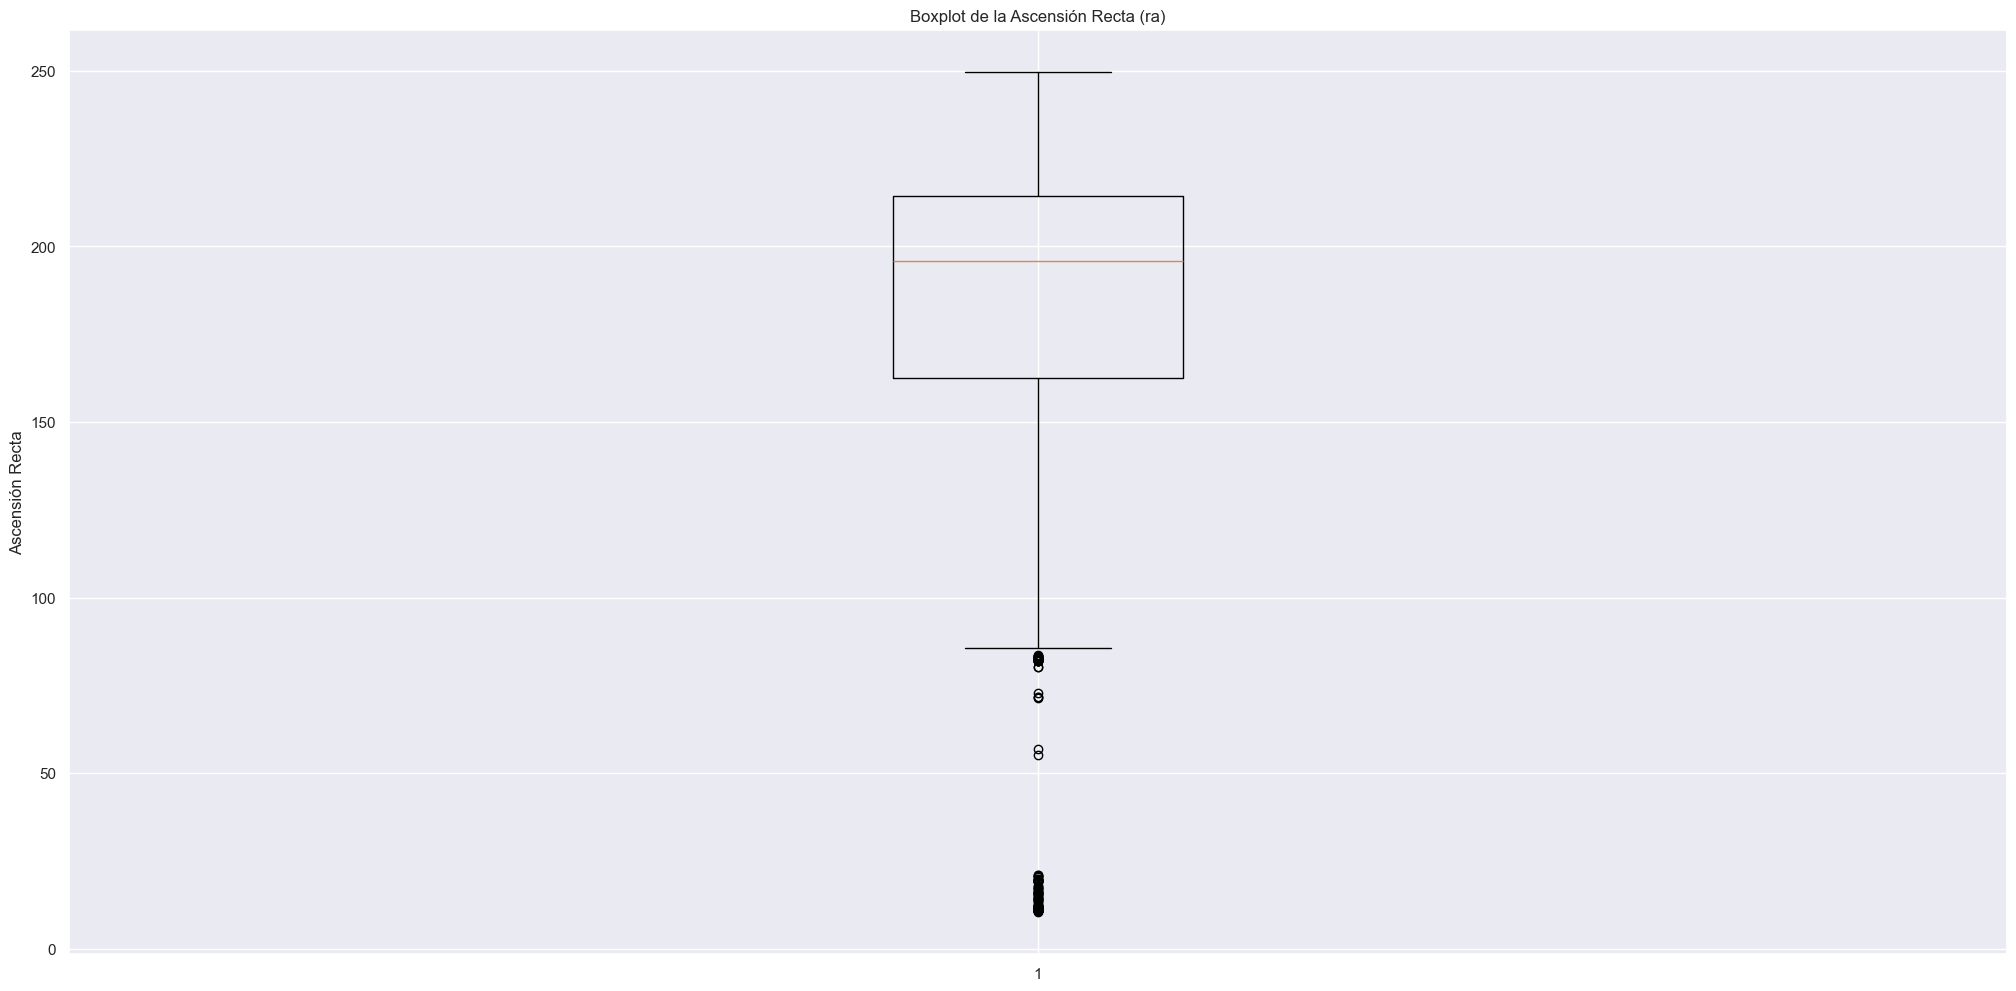

In [307]:
#Revisamos si se encuentra dentro del rango intercuartil, los valores que se encuentren por fuera de esto son outlayers [Q1‚àí1.5√óIQR,Q3+1.5√óIQR]

Q1 = data['ra'].quantile(0.25)
Q3 = data['ra'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q1,Q3,IQR)
print(lower_bound,upper_bound) 
 
outliers = data[(data['ra'] < lower_bound) | (data['ra'] > upper_bound)]
# print(outliers['ra'])
outliers
plt.boxplot(data['ra'])
plt.title("Boxplot de la Ascensi√≥n Recta (ra)")
plt.ylabel("Ascensi√≥n Recta")
plt.show()

PENDIENTE PONER EN TIPO MARKDOWN
Distribuci√≥n General:
La mediana (l√≠nea naranja) se encuentra cerca del centro del caj√≥n, indicando que la distribuci√≥n no est√° demasiado sesgada.
La mayor√≠a de los datos se encuentran en el rango intercuartil (IQR), entre el primer y tercer cuartil.
Valores At√≠picos (Outliers):
Se observan varios outliers en la parte inferior, lo que sugiere que hay valores significativamente bajos de ascensi√≥n recta en comparaci√≥n con la mayor√≠a de los datos.
Algunos de estos valores est√°n bastante lejos del l√≠mite inferior del bigote, indicando que podr√≠an ser errores de medici√≥n o registros especiales que deben analizarse m√°s a fondo.
L√≠mites de los Bigotes:
El l√≠mite inferior del bigote est√° alrededor de 90 pero hay valores por debajo de 50, que se consideran at√≠picos seg√∫n el m√©todo del IQR.
El l√≠mite superior est√° alrededor de 250, sin outliers significativos en esta direcci√≥n, lo que sugiere que los valores altos no presentan anomal√≠as.

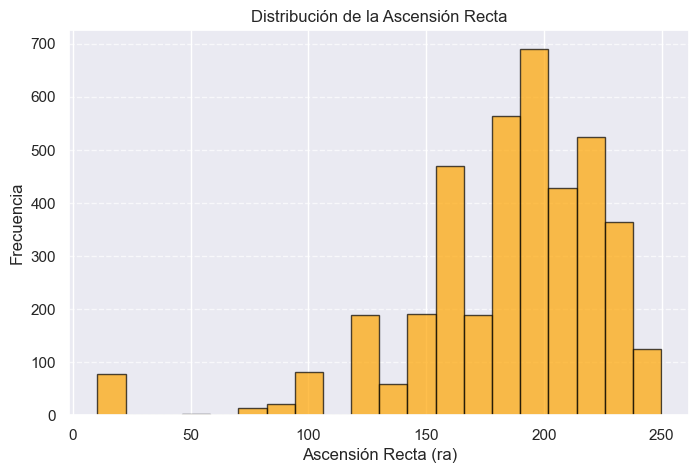

In [308]:
# Crear el histograma para visualizar la distribuci√≥n de 'ra'
plt.figure(figsize=(8, 5))
plt.hist(data["ra"], bins=20, edgecolor="black", alpha=0.7, color="orange")
plt.xlabel("Ascensi√≥n Recta (ra)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la Ascensi√≥n Recta")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [309]:
# for col in data.select_dtypes(include=['object']):
#     print(f"Valores √∫nicos en {col}:\n", data[col].unique())

## Columna dec
Describe: Ubicaci√≥n del objeto en su componente de declinaci√≥n de coordenada celeste.

In [310]:
data['dec'].describe()

count    3983.000000
mean       14.314905
std       114.863031
min       -71.778038
25%       -36.202090
50%         3.036634
75%        33.977314
max       793.776320
Name: dec, dtype: float64

In [311]:
#Ya que Dec describe la ubicaci√≥n del objeto en su componente de declinaci√≥n de coordenada celeste. Este valor debe de estar entre -90 y 90 grados.
out_rango = data[(data["dec"] < -90) | (data["dec"] > 90)]
print(out_rango)

                    objid         ra         dec         u         g  \
29    1237649918428708879  14.607180  782.547932  16.82643  15.43794   
67    1237649918427529256  11.841490  788.275356  18.99192  17.76341   
122   1237649918430675099  19.289872  762.471245  19.39130  17.31409   
140   1237649918427463866  11.755019  784.916269  19.58155  18.49723   
189   1237649918427332774  11.414186  785.036091  18.42381  16.56606   
...                   ...        ...         ...       ...       ...   
3654  1237649918427660313  12.091733  788.780188  17.67724  16.00506   
3739  1237649918428119075  13.239400  790.851466  18.17234  16.91165   
3759  1237649918431395974  20.967766  761.676817  18.24642  17.08067   
3883  1237649918427267203  11.165981  789.732934  19.52778  18.48113   
3996  1237649918427267086  11.165126  787.544236  17.46665  15.96142   

             r         i         z   run  camcol  field     score  clean  \
29    14.98633  14.71074  14.70645  1035       1     60  0.

-36.202089621657976 33.977314126969475 70.17940374862745
-141.47119524459913 139.24641974991064


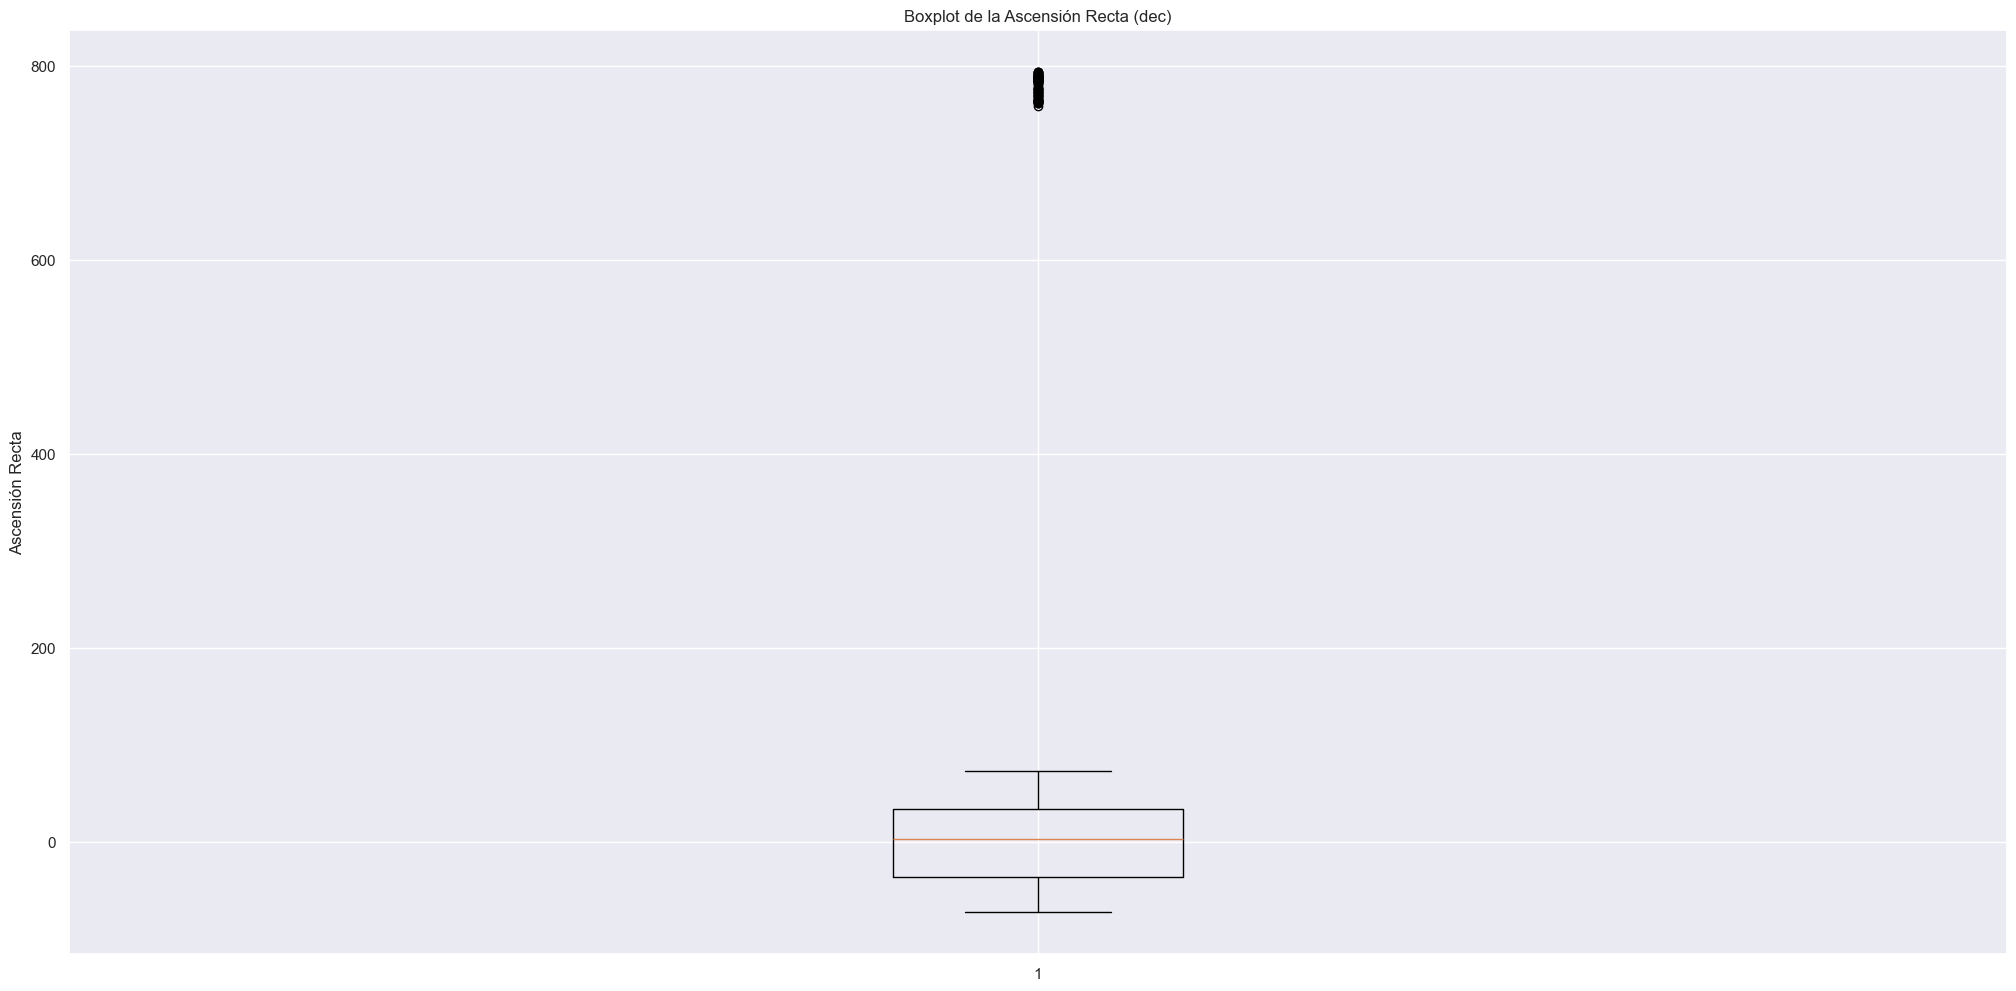

In [312]:
Q1 = data['dec'].quantile(0.25)
Q3 = data['dec'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q1,Q3,IQR)
print(lower_bound,upper_bound) 
 
outliers = data[(data['dec'] < lower_bound) | (data['dec'] > upper_bound)]
# print(outliers['dec'])
outliers
plt.boxplot(data['dec'])
plt.title("Boxplot de la Ascensi√≥n Recta (dec)")
plt.ylabel("Ascensi√≥n Recta")
plt.show()


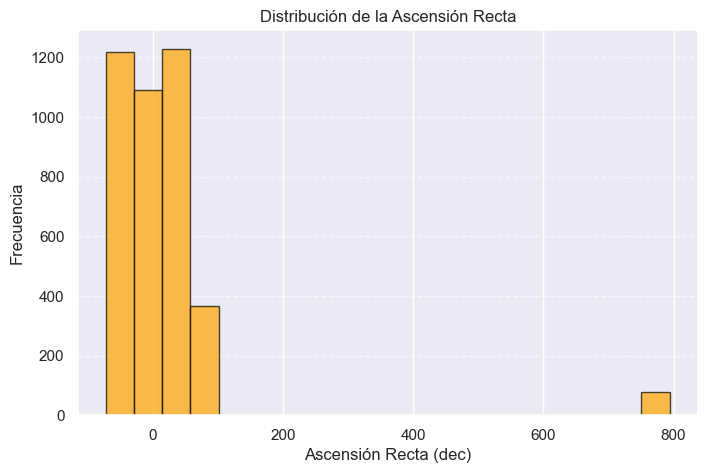

In [313]:
plt.figure(figsize=(8, 5))
plt.hist(data["dec"], bins=20, edgecolor="black", alpha=0.7, color="orange")
plt.xlabel("Ascensi√≥n Recta (dec)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la Ascensi√≥n Recta")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Vamos a revisar ese dato que se sale de la asension de la recta normal

In [314]:
# Valores a revisar ya que son valores lejos del centro
outliers2 = data[(data['dec'] > 10)]
outliers2

objid          ra         dec         u         g  \
0     1237648722306924571  185.574486   40.187398  19.11034  17.62099   
8     1237648722308890870  190.050847   39.859061  17.82951  15.90091   
10    1237648722831409163  157.264686   67.018153  16.29776  15.26695   
11    1237648721754914875  151.011930   19.692397  19.00329  17.36013   
14    1237648705678213667  245.943070   50.864445  19.07316  17.33798   
...                   ...         ...         ...       ...       ...   
3990  1237646382079803986   95.226126   54.846441  19.06613  17.34293   
3991  1237648722832982102  160.966485   60.830648  19.26472  17.15761   
3992  1237646381542867245   95.002628   25.161738  18.96944  17.39834   
3993  1237648721753080096  146.887742   12.459195  19.52121  17.74410   
3996  1237649918427267086   11.165126  787.544236  17.46665  15.96142   

             r         i         z   run  camcol  field     score  clean  \
0     17.03464  16.82993  16.71711   756       5    466  0.864145      1   
8     15.02515  14.61881  14.30353   756       5    496  0.822898      1   
10    15.09390  15.05828  15.10017   756       6    277  0.849116      1   
11    16.67788  16.41988  16.27547   756       4    235  0.889983      0   
14    16.44005  15.89485  15.53507   752       6    684  0.851995      1   
...        ...       ...       ...   ...     ...    ...       ...    ...   
3990  16.72245  16.43074  16.22178   211       6    362  0.816245      1   
3991  16.11110  15.66093  15.30986   756       6    301  0.852492      1   
3992  17.09692  16.97927  16.86172   211       5    361  0.837128      1   
3993  16.88671  16.40612  16.02948   756       4    207  0.850950      1   
3996  15.36014  15.14572  15.04453  1035       1     38  0.844826      1   

       class  redshift    mjd      rowv      colv  
0       STAR  0.000088  54140  0.002418  0.001363  
8     GALAXY  0.046341  51941 -0.000474 -0.001548  
10      STAR  0.000012  51957  0.000143 -0.000088  
11      STAR -0.000081  54479  0.004332  0.003924  
14       QSO  0.056787  52000  0.000309 -0.002255  
...      ...       ...    ...       ...       ...  
3990    STAR  0.000072  52931  0.000449 -0.000302  
3991  GALAXY  0.115905  51910  0.002422  0.001939  
3992       S  0.000249  52931 -0.000172  0.000898  
3993  GALAXY  0.062968  51630  0.001537 -0.006798  
3996    STAR  0.000042  53242 -0.000440 -0.000301  

[1828 rows x 18 columns]

## Columna U
Magnitud del objeto capturada en el filtro ultravioleta. Valor mayor a 0.

In [315]:
data['u'].describe()

count    3983.000000
mean       18.609083
std         0.839262
min        13.551780
25%        18.170070
50%        18.843730
75%        19.261455
max        19.599750
Name: u, dtype: float64

In [316]:
# Revisamos si es que existen valores por debajo del 0 
outliers = data[(data['u'] <= 0)]
outliers

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []

In [317]:
# Revisamos si es que existen valores por encima de 30, pq Normalmente, las magnitudes de objetos astron√≥micos en el filtro ultravioleta est√°n en un rango entre -5 y 25.
outliers = data[(data['u'] > 30)]
outliers

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []

18.170070000000003 19.261454999999998 1.0913849999999954
16.53299250000001 20.89853249999999


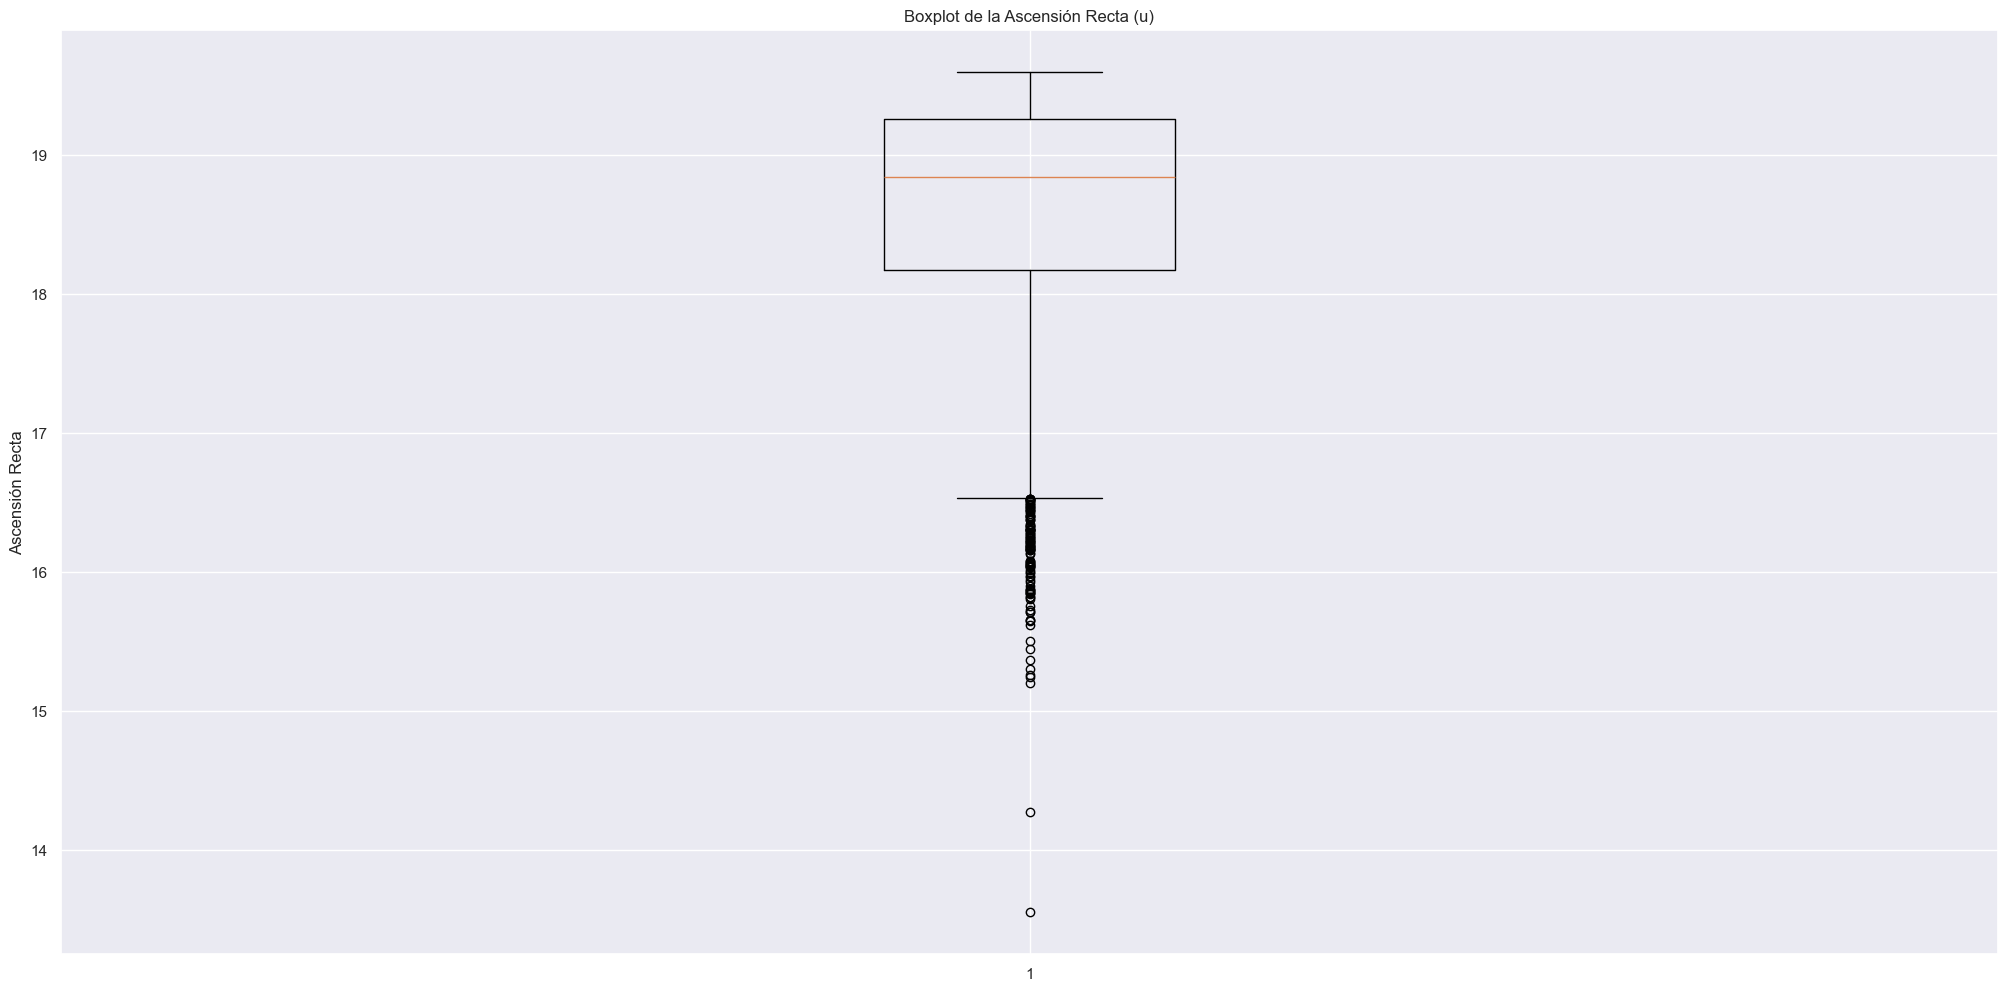

In [318]:
Q1 = data['u'].quantile(0.25)
Q3 = data['u'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q1,Q3,IQR)
print(lower_bound,upper_bound) 
 
outliers = data[(data['u'] < lower_bound) | (data['u'] > upper_bound)]
# print(outliers['dec'])
outliers
plt.boxplot(data['u'])
plt.title("Boxplot de la Ascensi√≥n Recta (u)")
plt.ylabel("Ascensi√≥n Recta")
plt.show()


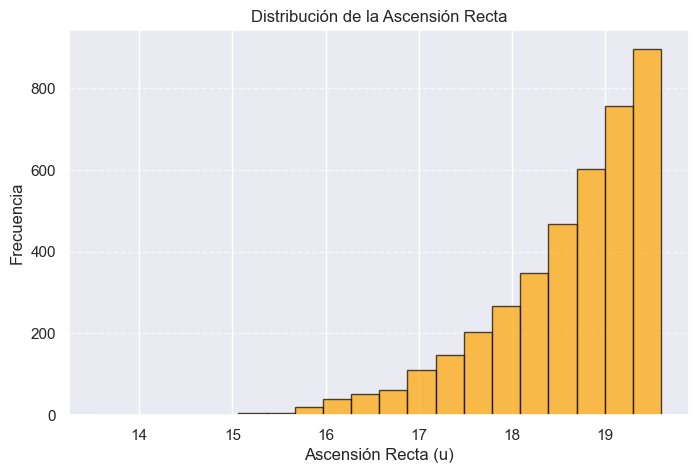

In [319]:
plt.figure(figsize=(8, 5))
plt.hist(data["u"], bins=20, edgecolor="black", alpha=0.7, color="orange")
plt.xlabel("Ascensi√≥n Recta (u)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la Ascensi√≥n Recta")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## Columna g
Describe: Ubicaci√≥n del objeto en su componente de declinaci√≥n de coordenada celeste.

In [320]:
data['g'].describe()

count    3983.000000
mean       17.363316
std         0.950536
min        12.974870
25%        16.793890
50%        17.472600
75%        17.995970
max        22.497450
Name: g, dtype: float64

In [321]:
#Ya que g describe la magnitud del objeto en el filtro verde este va entre 12-25
out_rango = data[(data["g"] > 25) | (data["g"] < 12)]
print(out_rango)

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []


In [322]:
menor0 = data[(data["g"] <= 0)]
print(menor0)

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []


16.79389 17.99597 1.2020799999999987
14.990770000000003 19.79909


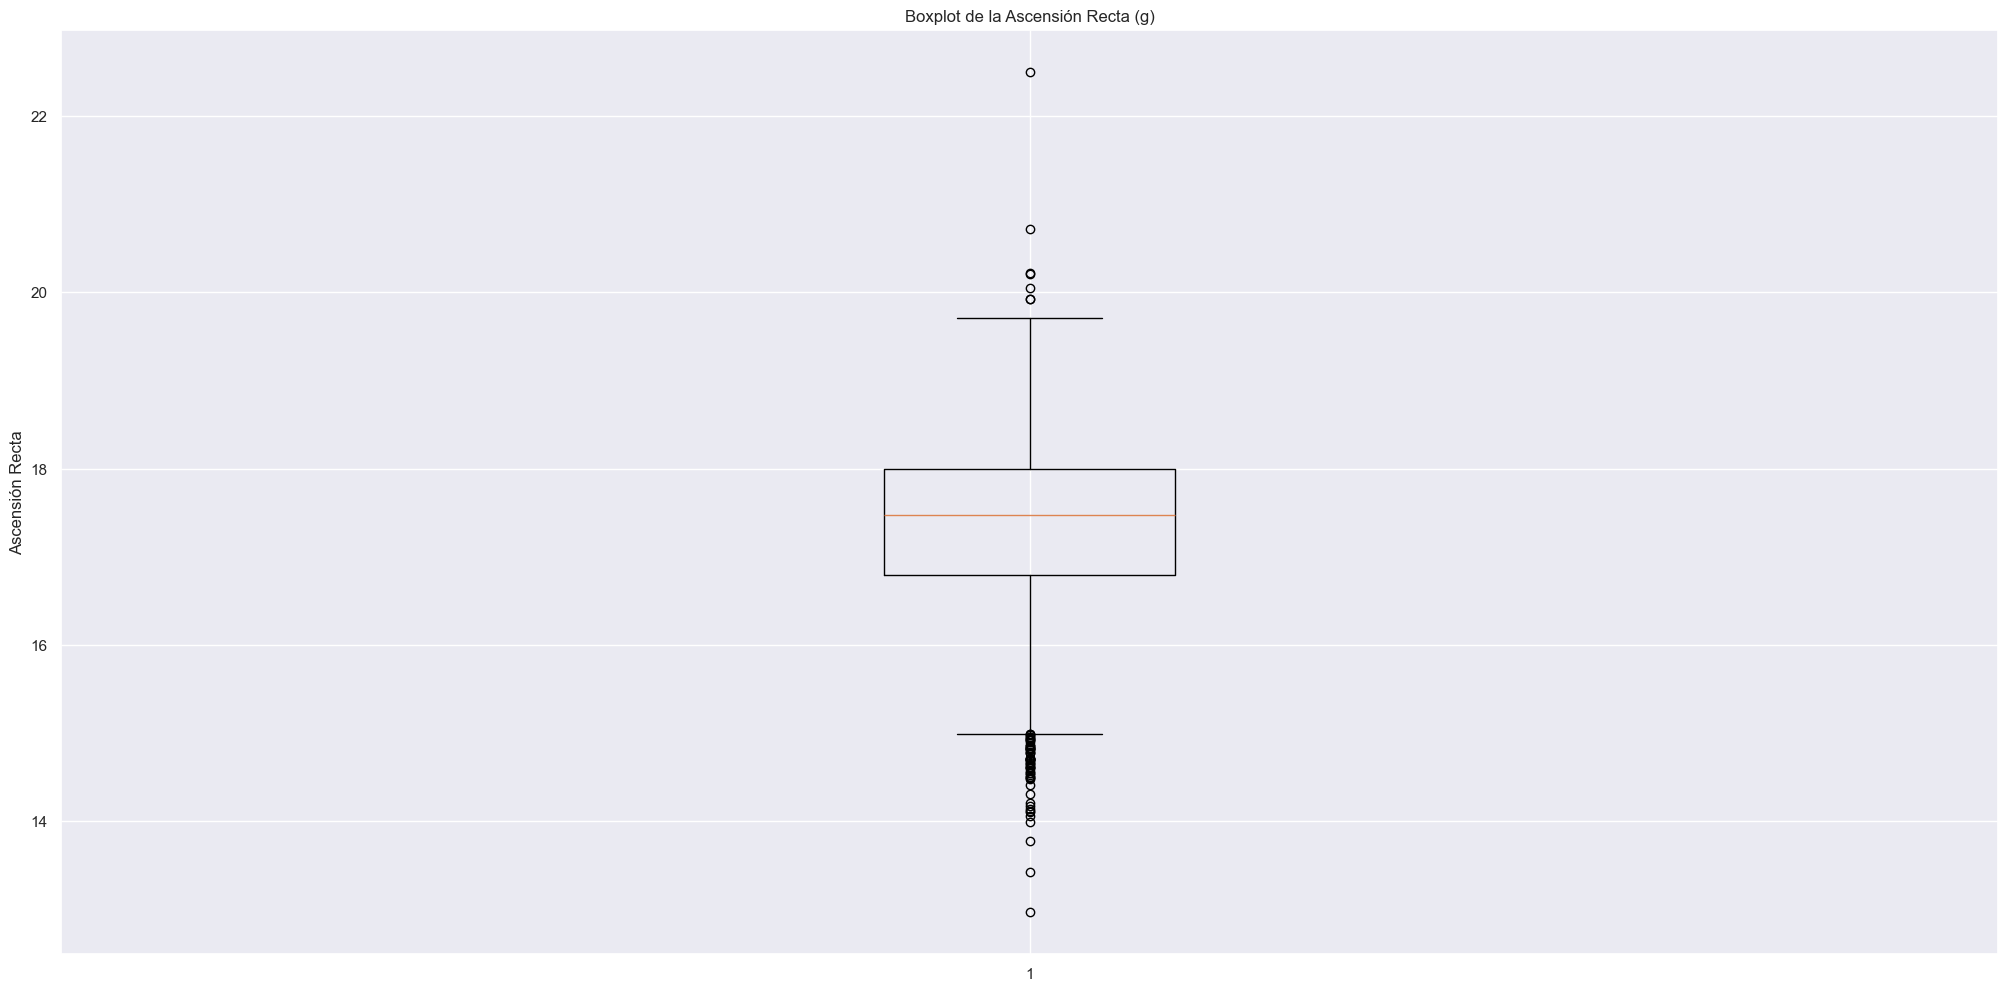

In [323]:
Q1 = data['g'].quantile(0.25)
Q3 = data['g'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(Q1,Q3,IQR)
print(lower_bound,upper_bound) 
 
outliers = data[(data['g'] < lower_bound) | (data['g'] > upper_bound)]
# print(outliers['g'])
outliers
plt.boxplot(data['g'])
plt.title("Boxplot de la Ascensi√≥n Recta (g)")
plt.ylabel("Ascensi√≥n Recta")
plt.show()

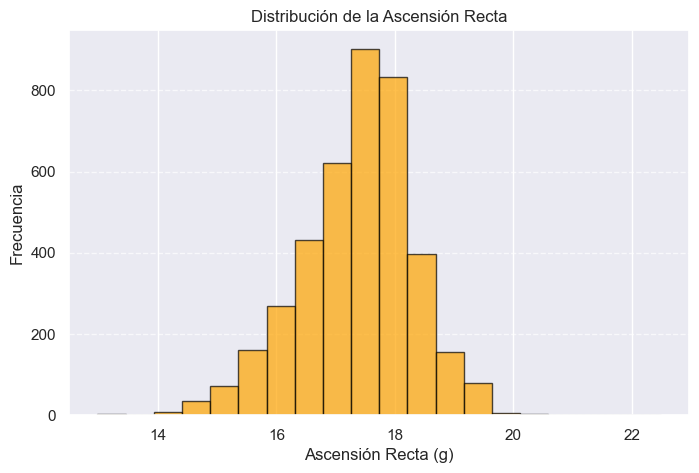

In [324]:
plt.figure(figsize=(8, 5))
plt.hist(data["g"], bins=20, edgecolor="black", alpha=0.7, color="orange")
plt.xlabel("Ascensi√≥n Recta (g)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la Ascensi√≥n Recta")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## Columna r
Describe: Magnitud del objeto capturada en el filtro rojo. Valor mayor a 0.

In [325]:
data['r'].describe()

count    3983.000000
mean       16.839563
std         1.055080
min        12.362850
25%        16.190330
50%        16.850600
75%        17.508155
max        22.265960
Name: r, dtype: float64

In [326]:
menor0 = data[(data["r"] <= 0)]
print(menor0)

Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, camcol, field, score, clean, class, redshift, mjd, rowv, colv]
Index: []


## Columna RedShift


In [327]:
data["redshift"].describe()

count    3983.000000
mean        0.134292
std         0.380487
min        -0.003322
25%         0.000106
50%         0.031775
75%         0.086468
max         4.192597
Name: redshift, dtype: float64

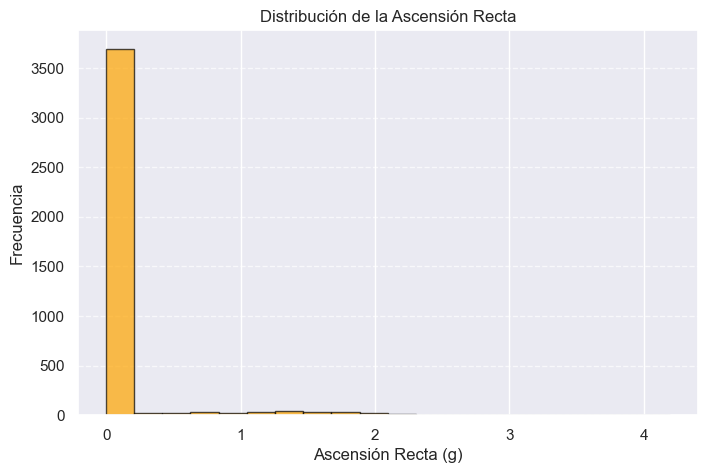

In [328]:
plt.figure(figsize=(8, 5))
plt.hist(data["redshift"], bins=20, edgecolor="black", alpha=0.7, color="orange")
plt.xlabel("Ascensi√≥n Recta (g)")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la Ascensi√≥n Recta")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [329]:
data["redshift"].min()

-0.003321956

In [330]:
negativos = data[data["redshift"] < 0]  # Filtra los valores negativos
cantidad_negativos = negativos.shape[0]  # Cuenta cu√°ntos son
print(f"N√∫mero de valores negativos en redshift: {cantidad_negativos}")

N√∫mero de valores negativos en redshift: 646


In [331]:
print(data.shape)
data = data[~((data["score"] < 0.4) & (data["clean"] == 0) & (data["redshift"]<=0))]
print(data.shape)

(3983, 18)
(3981, 18)


In [332]:
negativos = data[data["redshift"] < 0]  # Filtra los valores negativos
cantidad_negativos = negativos.shape[0]  # Cuenta cu√°ntos son
print(f"N√∫mero de valores negativos en redshift: {cantidad_negativos}")

N√∫mero de valores negativos en redshift: 644


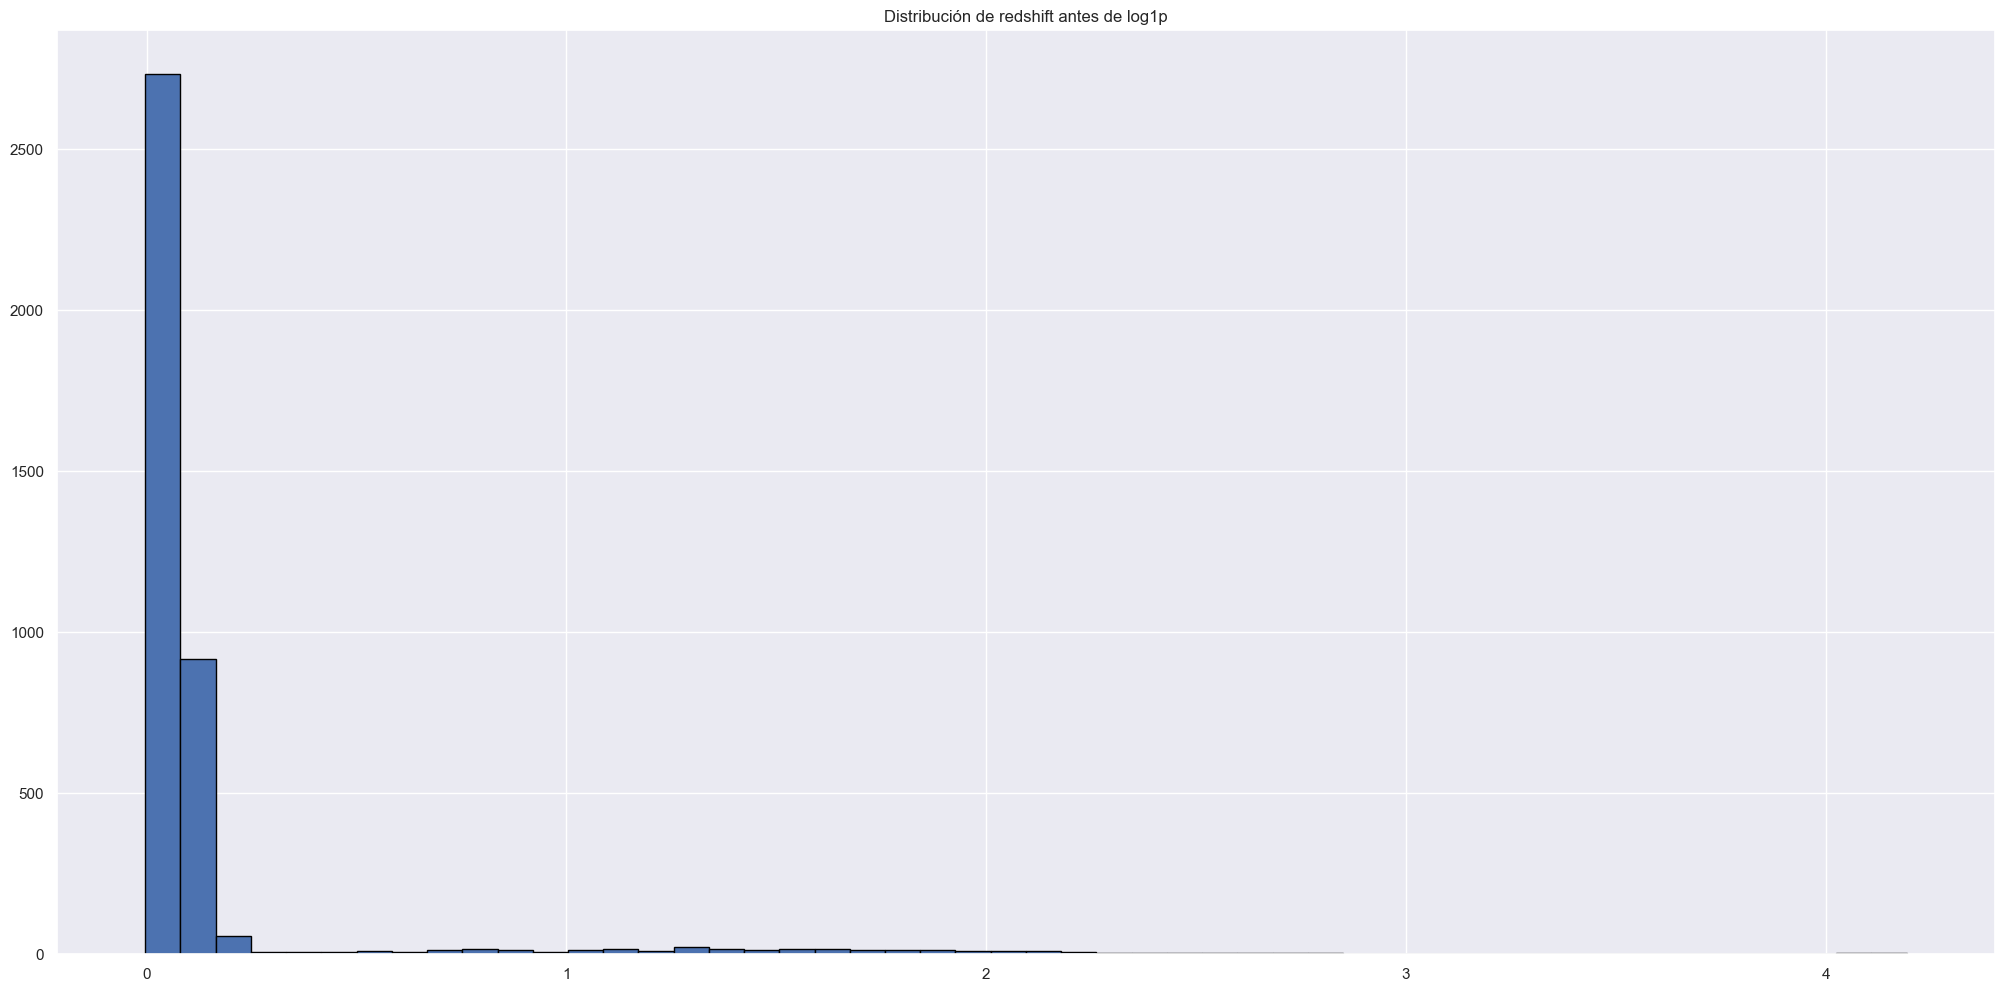

In [333]:
import matplotlib.pyplot as plt

plt.hist(data["redshift"], bins=50, edgecolor="black")
plt.title("Distribuci√≥n de redshift antes de log1p")
plt.show()

In [334]:
# data_filtered = data[(data["redshift"] >= 0) & (data["redshift"] <= 7)]

# # Mostrar cu√°ntos valores fueron eliminados
# print("Valores eliminados:", len(data) - len(data_filtered))
# data["redshift"] = log1p(data["redshift"])


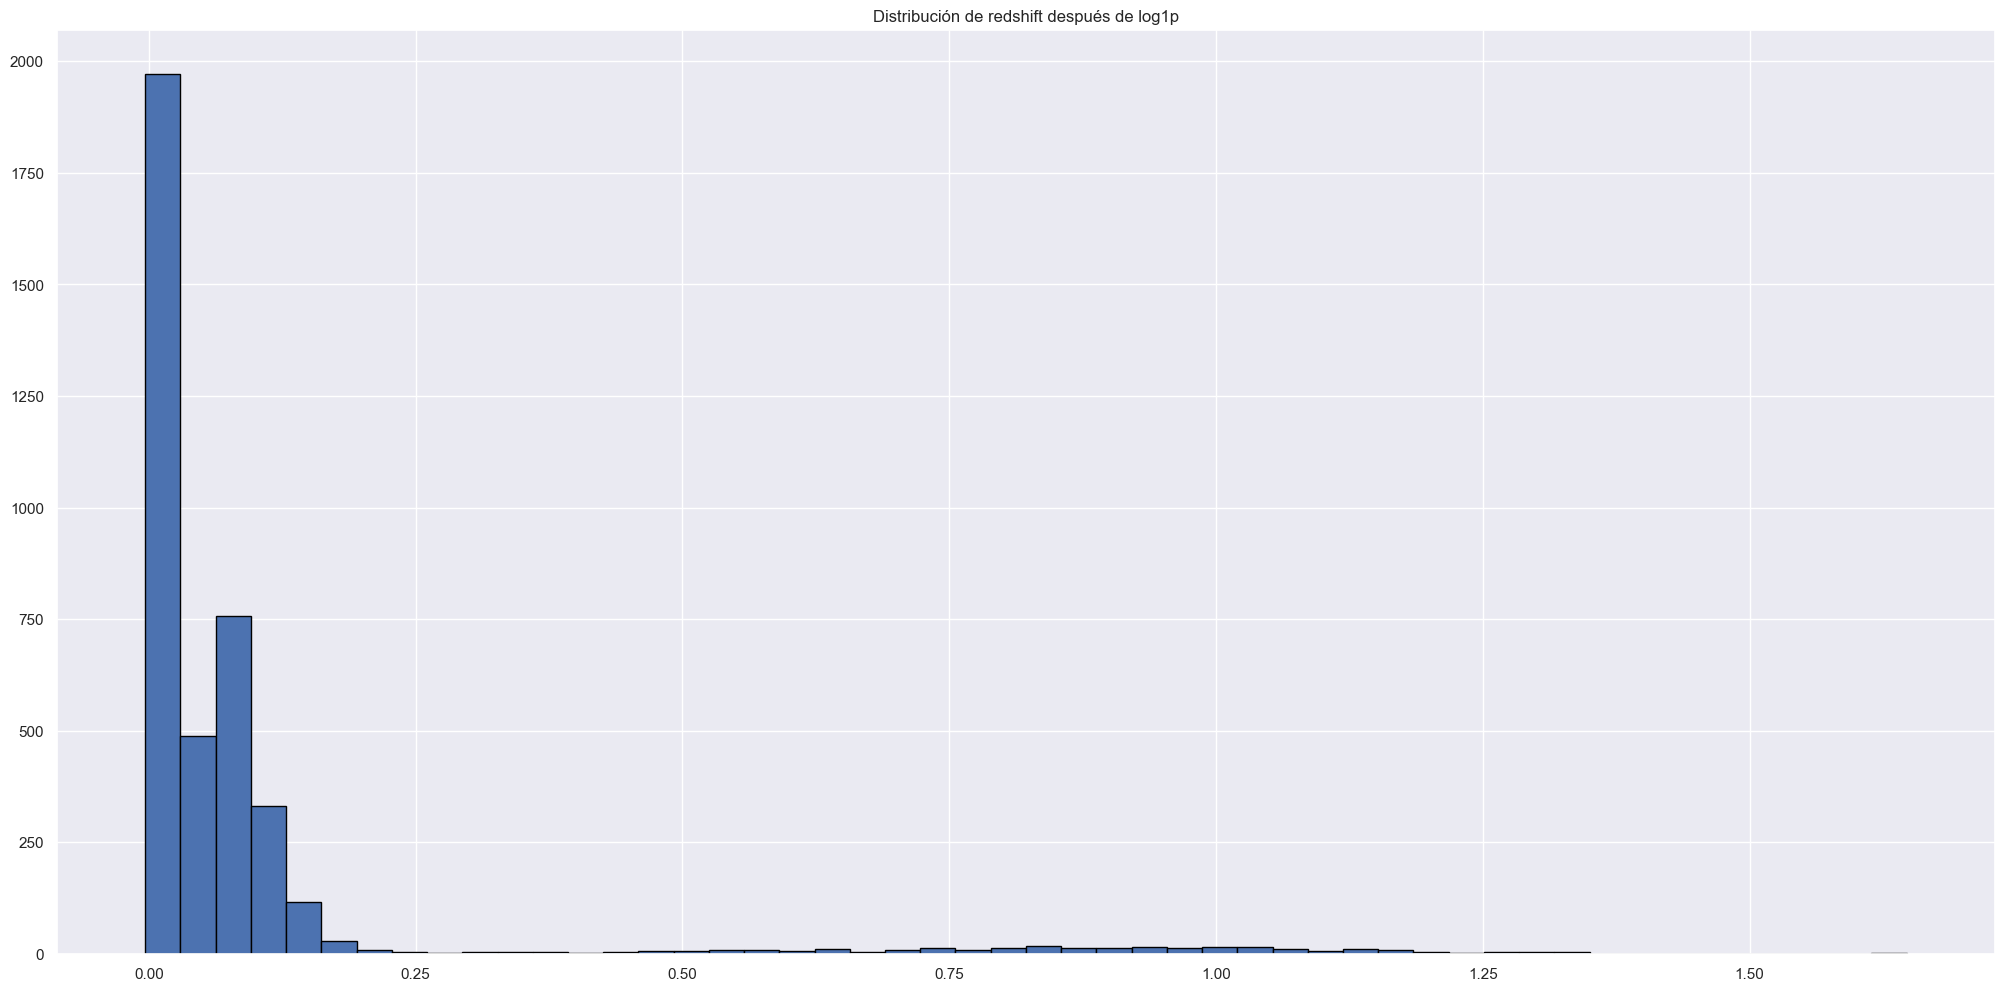

In [335]:
import numpy as np

data["redshift_log"] = np.log1p(data["redshift"])

plt.hist(data["redshift_log"], bins=50, edgecolor="black")
plt.title("Distribuci√≥n de redshift despu√©s de log1p")
plt.show()


üìå 1Ô∏è‚É£ Para manejar valores peque√±os y cercanos a 0

redshift tiene muchos valores cerca de 0, y una transformaci√≥n logar√≠tmica puede expandir esos valores peque√±os para mejorar la distribuci√≥n de los datos.
üìå 2Ô∏è‚É£ Para reducir el impacto de valores grandes (outliers)

Si redshift tiene algunos valores muy altos (z > 3), la regresi√≥n puede verse afectada.
log1p comprime valores grandes, haciendo que el modelo sea m√°s estable.

In [336]:
data["redshift"].describe()

count    3981.000000
mean        0.134359
std         0.380570
min        -0.003322
25%         0.000108
50%         0.031830
75%         0.086470
max         4.192597
Name: redshift, dtype: float64

## Columna z
Describe: Magnitud del objeto capturada en el filtro casi-infrarrojo. Valor mayor a 0.

In [337]:
data['z'].describe()

count    3981.000000
mean       16.438960
std         1.190723
min        11.799530
25%        15.627590
50%        16.401350
75%        17.147810
max        20.847690
Name: z, dtype: float64

## Columna i
Describe: Magnitud del objeto capturada en el filtro infrarrojo. Valor mayor a 0.

In [338]:
data['i'].describe()

count    3981.000000
mean       16.597279
std         1.141377
min        12.010790
25%        15.870730
50%        16.568220
75%        17.259840
max        28.179630
Name: i, dtype: float64

## Columna score

#### 1. Visualizar como se distribuyen los datos entre 0 y 1 por cuartiles

In [339]:
data['score'].describe()

count    3981.000000
mean        0.852013
std         0.070519
min         0.301912
25%         0.836868
50%         0.860675
75%         0.879834
max         0.961145
Name: score, dtype: float64

#### 2. Visualizaci√≥n Gr√°fica

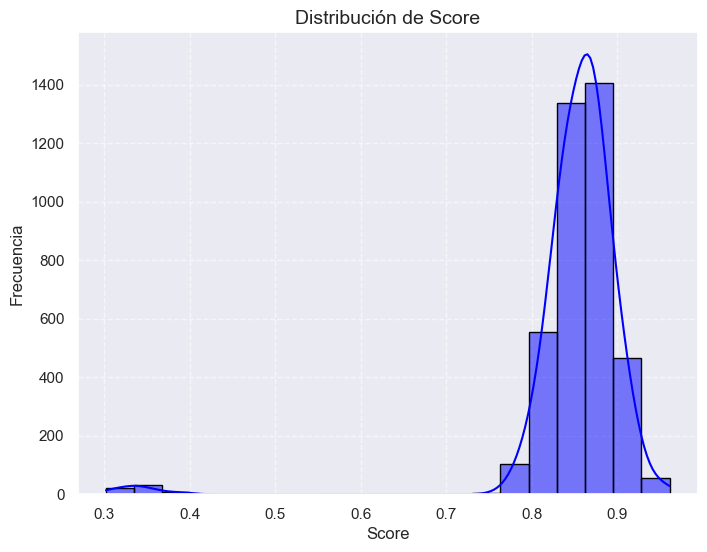

Esto nos d√° a entender que la mayor√≠a de las observaciones presentan una alta calidad, adem√°s no se presentaron datos fuera del rango 0 - 1


In [340]:
# Crear el histograma
plt.figure(figsize=(8, 6))
sb.histplot(data['score'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title("Distribuci√≥n de Score", fontsize=14)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
print("Esto nos d√° a entender que la mayor√≠a de las observaciones presentan una alta calidad, adem√°s no se presentaron datos fuera del rango 0 - 1")

#### 3. Eliminar datos que tienen una score y un clean 0

Decidimos eliminar ciertos datos con una score y clean bajo ya que no aportan mucho a nuestro analisis

In [341]:
print(data.shape)
data = data[~((data["score"] < 0.4) & (data["clean"] == 0))]
print(data.shape)

(3981, 19)
(3974, 19)


## Columna clean

#### 1. Describir por cuartiles los datos de clean

In [342]:
data['clean'].describe()

count    3974.000000
mean        0.897333
std         0.303562
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: clean, dtype: float64

#### 2. An√°lisis grafico para detectar anomal√≠as

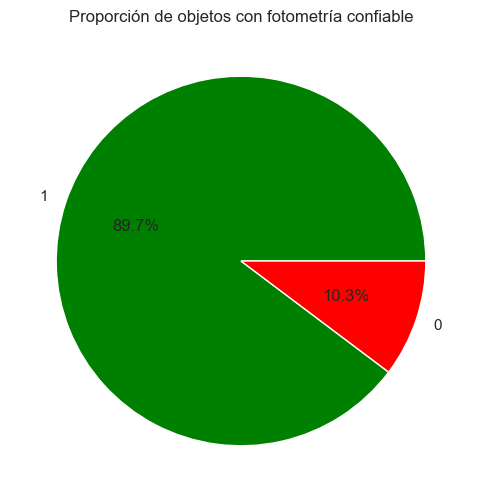

Se observa que todos los datos son binarios , es decir 0 o 1, no se detectaron anomal√≠as


In [343]:
plt.figure(figsize=(6,6))
data['clean'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])

plt.title("Proporci√≥n de objetos con fotometr√≠a confiable")
plt.ylabel("")
plt.show()
print("Se observa que todos los datos son binarios , es decir 0 o 1, no se detectaron anomal√≠as")

## Columna camcol
Describe: Columna de la c√°mara en la que se registr√≥ el objeto.

camcol
1    797
4    749
5    714
2    629
3    580
6    505
Name: count, dtype: int64
Valores √∫nicos: [5 1 2 3 6 4]


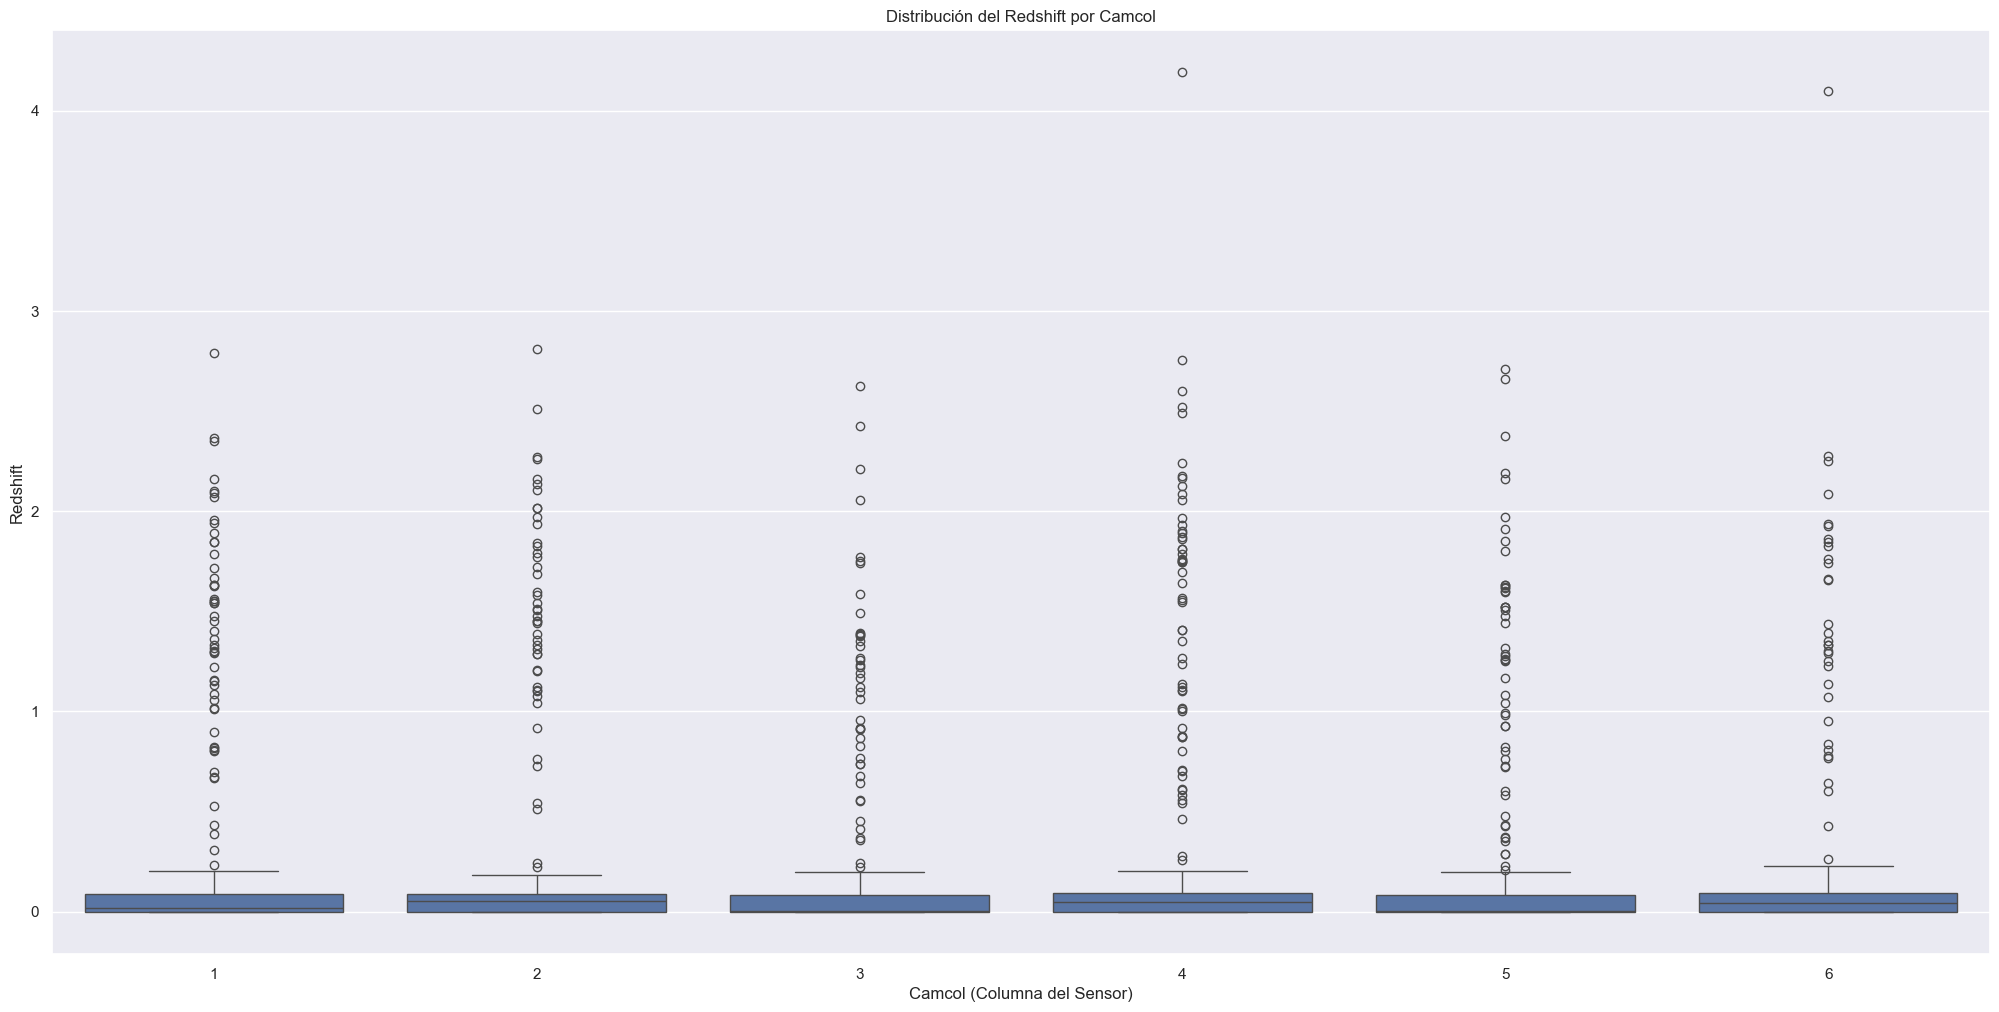

Correlaci√≥n entre camcol y redshift: -0.0029476507126094515


In [344]:
print(data['camcol'].value_counts())
print("Valores √∫nicos:", data['camcol'].unique())

#Podemos ver que es una columna numerica pero deberia de ser categorica solo toma valores 
# espec√≠ficos como {1, 2, 3, 4, 5, 6}, es m√°s una categor√≠a que un n√∫mero
sb.boxplot(x=data["camcol"], y=data["redshift"])
plt.xlabel("Camcol (Columna del Sensor)")
plt.ylabel("Redshift")
plt.title("Distribuci√≥n del Redshift por Camcol")
plt.show()
correlation = data["camcol"].corr(data["redshift"])
print("Correlaci√≥n entre camcol y redshift:", correlation)

In [345]:
data['camcol'] = data['camcol'].astype('category')
print("Tipo de dato:", data['camcol'].dtype)

Tipo de dato: category


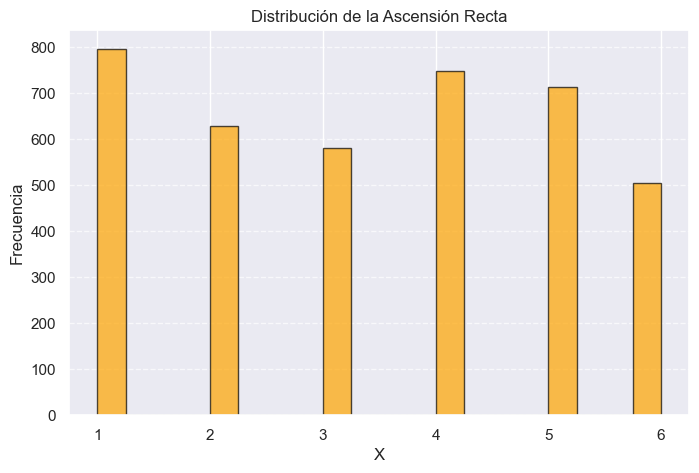

In [346]:
plt.figure(figsize=(8, 5))
plt.hist(data["camcol"], bins=20, edgecolor="black", alpha=0.7, color="orange")
plt.xlabel("X")
plt.ylabel("Frecuencia")
plt.title("Distribuci√≥n de la Ascensi√≥n Recta")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Analizando la correlaci√≥n decidimos que no es una variable que influye directamente al redshift entonces la omitimos

## Columna field
Describe: Secci√≥n de la columna de la c√°mara en la que se registr√≥ el objeto.


In [347]:
for col in data.columns:
    unique_values = data[col].nunique()
    print(f"{col}: {unique_values} valores √∫nicos")

objid: 3974 valores √∫nicos
ra: 3974 valores √∫nicos
dec: 3974 valores √∫nicos
u: 3943 valores √∫nicos
g: 3944 valores √∫nicos
r: 3954 valores √∫nicos
i: 3950 valores √∫nicos
z: 3959 valores √∫nicos
run: 7 valores √∫nicos
camcol: 6 valores √∫nicos
field: 663 valores √∫nicos
score: 1559 valores √∫nicos
clean: 2 valores √∫nicos
class: 6 valores √∫nicos
redshift: 3923 valores √∫nicos
mjd: 183 valores √∫nicos
rowv: 3970 valores √∫nicos
colv: 3969 valores √∫nicos
redshift_log: 3923 valores √∫nicos


In [348]:
print(data["field"].isna().sum())  # Cuenta los valores NaN en la columna


0


## Columna class

#### 1. Revisi√≥n de como se distribuyen las clases

In [349]:
data['class'].describe()
print("Valores √∫nicos en 'class':", data['class'].unique())
print("\nValores nulos en 'class':", data['class'].isnull().sum())

# Ver distribuci√≥n de las clases
print("\nDistribuci√≥n de clases:")
print(data['class'].value_counts())

Valores √∫nicos en 'class': ['STAR' 'GALAXY' 'QSO' 'S' 'QUASAR' 'G']

Valores nulos en 'class': 0

Distribuci√≥n de clases:
class
GALAXY    1840
STAR      1624
QSO        291
S          174
G           44
QUASAR       1
Name: count, dtype: int64


#### 2. Hacer estandarizaci√≥n de las columnas

En este caso por intuici√≥n vamos a tomar los datos de clasificaci√≥n G y convertirlos GALAXY

In [350]:
# Reemplazar 'G' por 'GALAXY'
data['class'] = data['class'].replace('G', 'GALAXY')

Por otro lado para los datos que tienen la clasificaci√≥n S los modificaremos para que sean STAR

In [351]:
# Reemplazar 'S' por 'STAR'
data['class'] = data['class'].replace('S', 'STAR')

Tambien para hacer el uso de solo una etiqueta cambiamos Quasar por QSO

In [352]:
# Reemplazar 'QUASAR' por 'QSO'
data['class'] = data['class'].replace('QUASAR', 'QSO')

Luego volvemos a revisar si ya se hicieron los cambios correctamente

In [353]:
data['class'].describe()
print("Valores √∫nicos en 'class':", data['class'].unique())
print("\nValores nulos en 'class':", data['class'].isnull().sum())

# Ver distribuci√≥n de las clases
print("\nDistribuci√≥n de clases:")
print(data['class'].value_counts())

Valores √∫nicos en 'class': ['STAR' 'GALAXY' 'QSO']

Valores nulos en 'class': 0

Distribuci√≥n de clases:
class
GALAXY    1884
STAR      1798
QSO        292
Name: count, dtype: int64


#### 3. Transformaci√≥n para facilitar el modelo de regresi√≥n

Primero se hace una selecci√≥n de las variables relevantes 

In [354]:
features=["ra","dec","u","g","r","z","i","class","redshift","mjd"]
data=data[features]
data.head()

ra        dec         u         g         r         z         i  \
0  185.574486  40.187398  19.11034  17.62099  17.03464  16.71711  16.82993   
1  203.801841 -48.925211  18.90957  17.62940  17.01465  16.35239  16.62059   
2  160.034264 -24.157376  19.26340  17.67693  16.82551  16.13864  16.42307   
3  200.807373 -39.077125  18.82022  17.77765  17.38575  16.93540  17.11128   
4  189.792404 -57.380593  18.91391  19.05355  19.46278  20.09613  19.75660   

    class      redshift    mjd  
0    STAR  8.780529e-05  54140  
1  GALAXY  8.619995e-02  51955  
2  GALAXY  1.330486e-01  51913  
3  GALAXY  8.636355e-02  51959  
4    STAR -4.090000e-08  54562

In [355]:
dumies=pd.get_dummies(data["class"], dtype=int)
data=pd.concat([data, dumies], axis=1)
data.head()

ra        dec         u         g         r         z         i  \
0  185.574486  40.187398  19.11034  17.62099  17.03464  16.71711  16.82993   
1  203.801841 -48.925211  18.90957  17.62940  17.01465  16.35239  16.62059   
2  160.034264 -24.157376  19.26340  17.67693  16.82551  16.13864  16.42307   
3  200.807373 -39.077125  18.82022  17.77765  17.38575  16.93540  17.11128   
4  189.792404 -57.380593  18.91391  19.05355  19.46278  20.09613  19.75660   

    class      redshift    mjd  GALAXY  QSO  STAR  
0    STAR  8.780529e-05  54140       0    0     1  
1  GALAXY  8.619995e-02  51955       1    0     0  
2  GALAXY  1.330486e-01  51913       1    0     0  
3  GALAXY  8.636355e-02  51959       1    0     0  
4    STAR -4.090000e-08  54562       0    0     1

#### 4. An√°lisis Gr√°fico de la columna

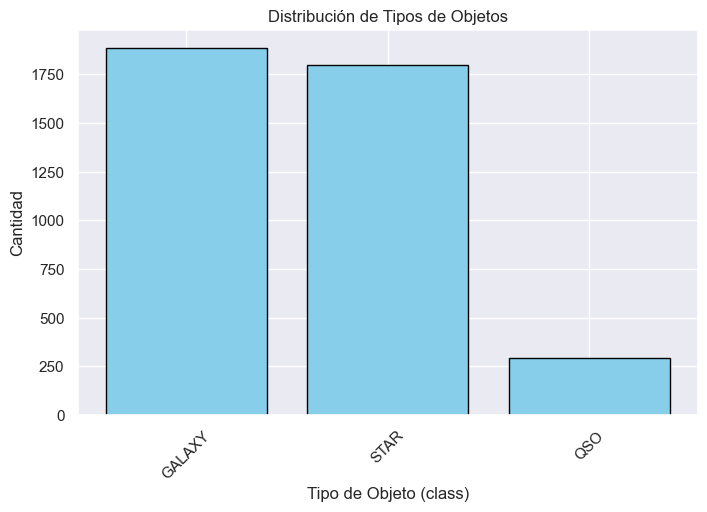

In [356]:
# Contar las ocurrencias de cada clase
class_counts = data['class'].value_counts()

# Crear el gr√°fico de barras
plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

# Etiquetas y t√≠tulo
plt.xlabel("Tipo de Objeto (class)")
plt.ylabel("Cantidad")
plt.title("Distribuci√≥n de Tipos de Objetos")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad

# Mostrar el gr√°fico
plt.show()

Eliminaci√≥n de la columna class

In [357]:
data=data.drop(["class"],axis=1)
data.head()

ra        dec         u         g         r         z         i  \
0  185.574486  40.187398  19.11034  17.62099  17.03464  16.71711  16.82993   
1  203.801841 -48.925211  18.90957  17.62940  17.01465  16.35239  16.62059   
2  160.034264 -24.157376  19.26340  17.67693  16.82551  16.13864  16.42307   
3  200.807373 -39.077125  18.82022  17.77765  17.38575  16.93540  17.11128   
4  189.792404 -57.380593  18.91391  19.05355  19.46278  20.09613  19.75660   

       redshift    mjd  GALAXY  QSO  STAR  
0  8.780529e-05  54140       0    0     1  
1  8.619995e-02  51955       1    0     0  
2  1.330486e-01  51913       1    0     0  
3  8.636355e-02  51959       1    0     0  
4 -4.090000e-08  54562       0    0     1

Actualizaci√≥n features

In [358]:
features=["ra","dec","u","g","r","z","i","redshift","mjd","GALAXY","QSO","STAR"]

## Regresi√≥n lineal

<Axes: >

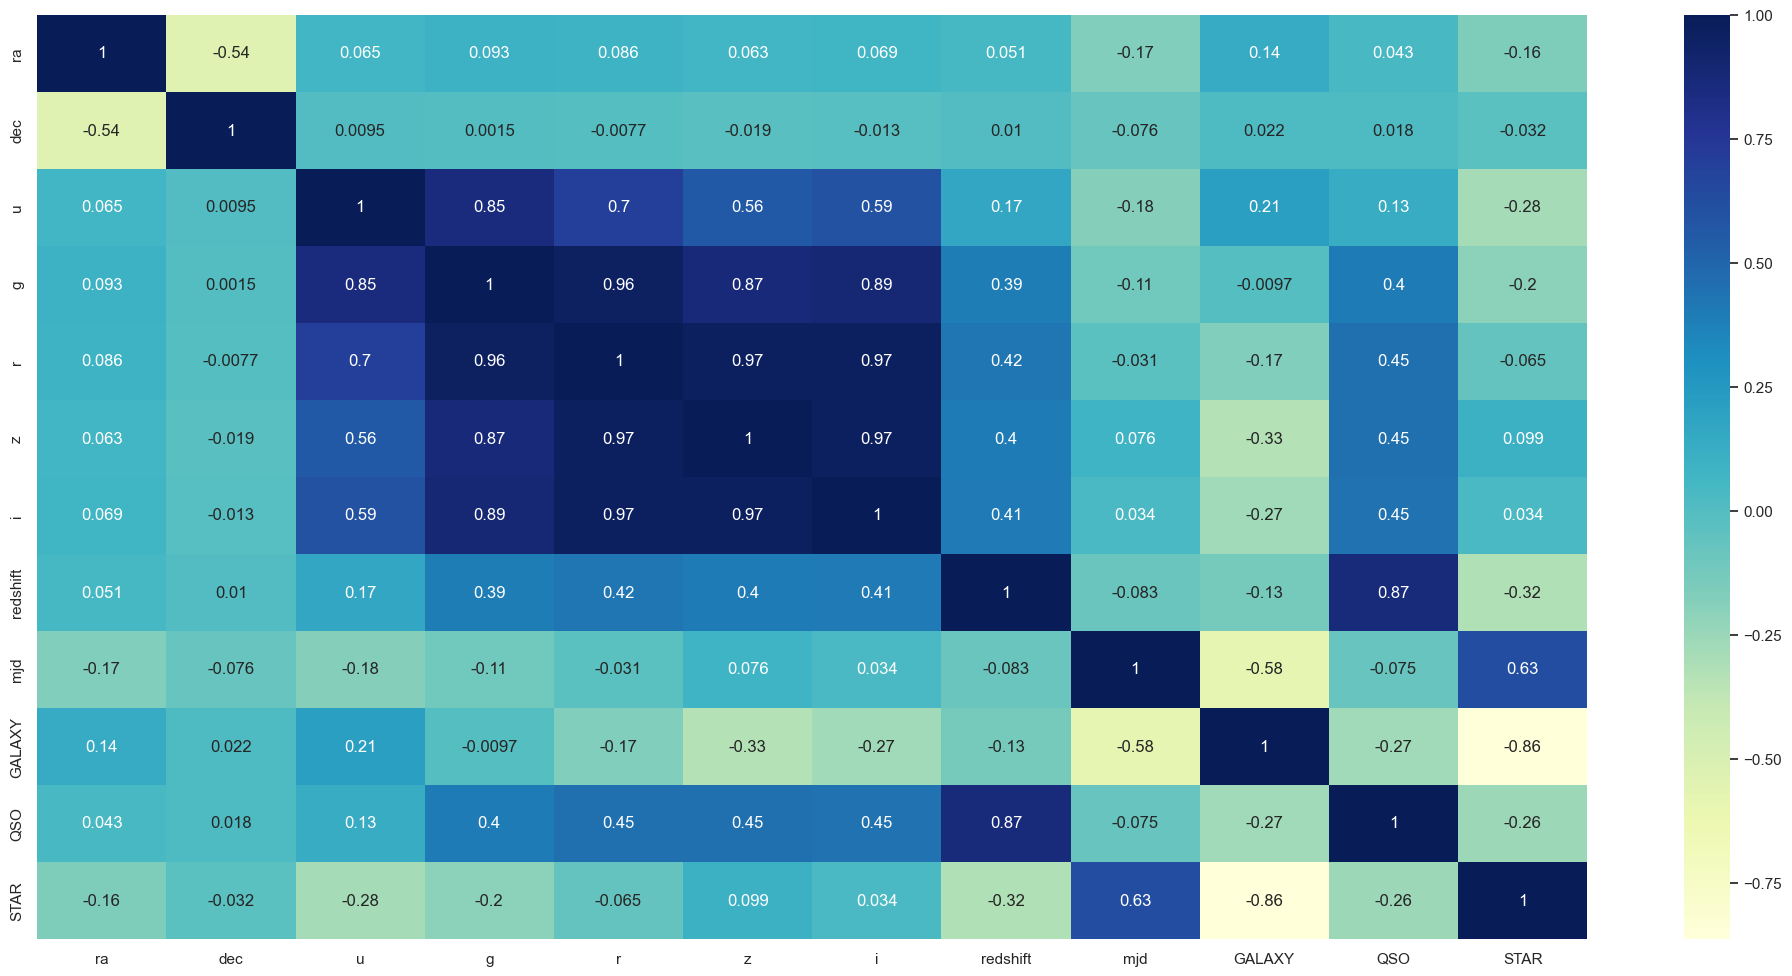

In [359]:
sb.set(rc={"figure.figsize":(25,12)})
sb.heatmap( data.corr(),annot=True, cmap="YlGnBu" )

In [360]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=["redshift", "mjd"])  # Eliminamos redshift y mjd
y = data["redshift"]  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [361]:
X_train.shape, y_train.shape

((2781, 10), (2781,))

In [362]:
X_test.shape, y_test.shape

((1193, 10), (1193,))

In [363]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Interpretaci√≥n de los coeficientes y del intercepto

In [364]:
features = X.columns
pd.DataFrame({"columns": features, "coef": regression.coef_})

columns      coef
0      ra -0.000154
1     dec -0.000067
2       u -0.010481
3       g -0.029490
4       r  0.099402
5       z -0.044306
6       i -0.001864
7  GALAXY -0.372040
8     QSO  0.824304
9    STAR -0.452264

Intercepto de la regresi√≥n

In [365]:
regression.intercept_

0.2773696264634458

In [366]:
#PRUEBA
# y_test=np.expm1(y_test)

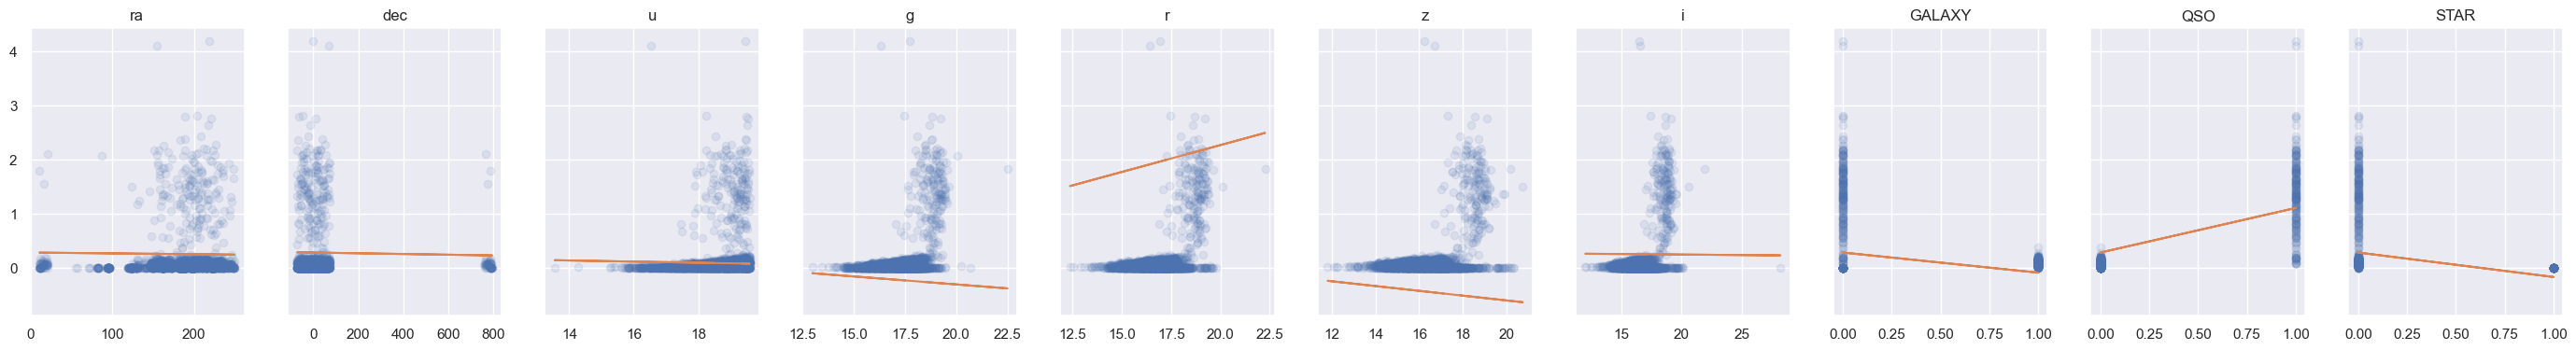

In [367]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(35, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

Validaci√≥n del modelo

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [368]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 0.05976846030946444
Test: 0.06084043768668658


**Root Mean Squeared Error (RMSE)**

$$ RMSE =  \sqrt{{1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } }$$

In [369]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 0.1885549874528756
Test: 0.18082800448909048


In [370]:
r2_train = r2_score(y_train, regression.predict(X_train))
r2_test = r2_score(y_test, regression.predict(X_test))

print("R^2 Train:", r2_train)
print("R^2 Test:", r2_test)


R^2 Train: 0.7627480051336354
R^2 Test: 0.7556255720189882


An√°lisis del error

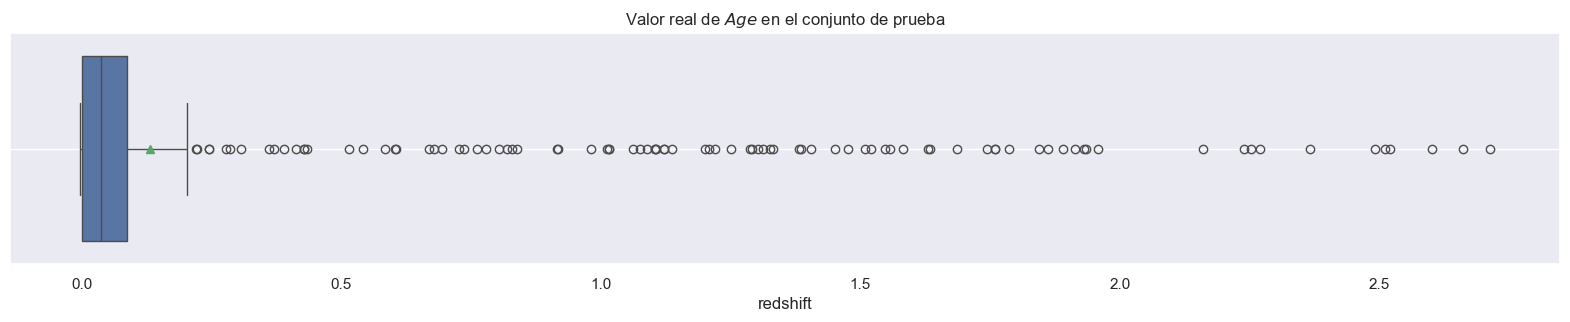

In [371]:
plt.figure(figsize=(20, 3))
sb.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{Age}$ en el conjunto de prueba")
plt.grid()
plt.show()

## Entrenamiento de un segundo modelo aplicando normalizaci√≥n

In [372]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [373]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [374]:
pd.DataFrame({"columns": features, "coef": pipeline["model"].coef_})

columns      coef
0      ra -0.006531
1     dec -0.008070
2       u -0.008879
3       g -0.028296
4       r  0.105620
5       z -0.052926
6       i -0.002137
7  GALAXY -0.055317
8     QSO  0.285521
9    STAR -0.095321

In [375]:
pipeline["model"].intercept_

0.13547349635569383

In [376]:
y_train.mean(), y_test.mean()

(0.13547349635569367, 0.1322783529843336)

In [377]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))


MAE:
Train: 0.059768460309466025
Test: 0.060840437686687655


In [378]:
print("RMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

RMSE:
Train: 0.1885549874528756
Test: 0.18082800448909053


## Validaci√≥n de supuestos de la regresi√≥n

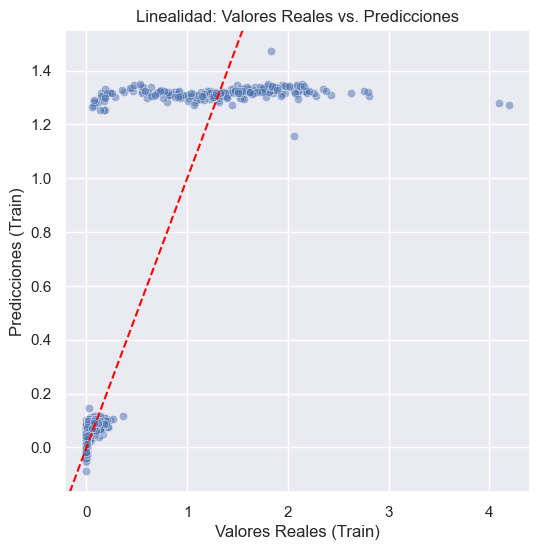

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_train = pipeline.predict(X_train)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5)
plt.xlabel("Valores Reales (Train)")
plt.ylabel("Predicciones (Train)")
plt.title("Linealidad: Valores Reales vs. Predicciones")
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.show()


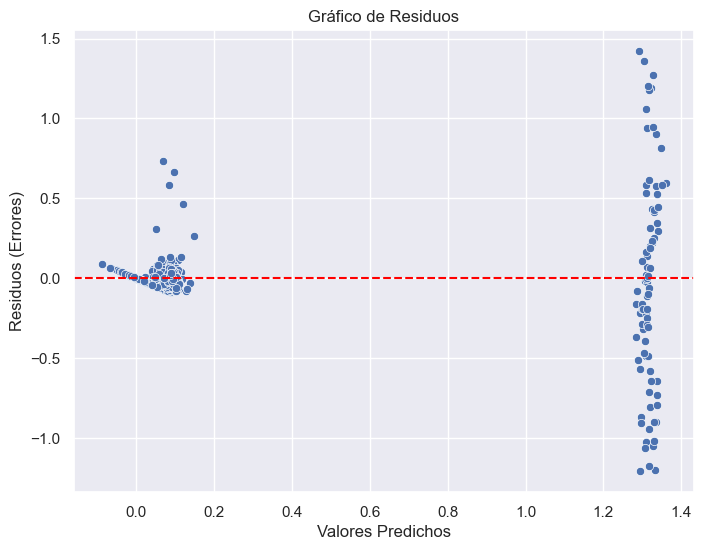

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos los residuos
residuos = y_test - pipeline.predict(X_test)

# Graficamos los residuos vs. predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pipeline.predict(X_test), y=residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos (Errores)")
plt.title("Gr√°fico de Residuos")
plt.show()



In [381]:
import numpy as np
print("Desviaci√≥n est√°ndar de los residuos:", np.std(residuos))



Desviaci√≥n est√°ndar de los residuos: 0.180821232772595


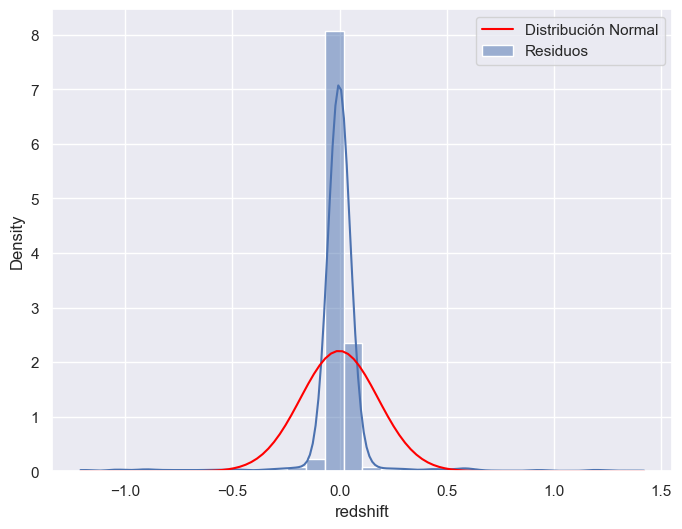

In [382]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Ajustamos una distribuci√≥n normal a los residuos
mu, std = stats.norm.fit(residuos)

# Graficamos la distribuci√≥n te√≥rica
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=30, kde=True, stat="density", label="Residuos")
x = np.linspace(min(residuos), max(residuos), 100)
plt.plot(x, stats.norm.pdf(x, mu, std), color="red", label="Distribuci√≥n Normal")
plt.legend()
plt.show()


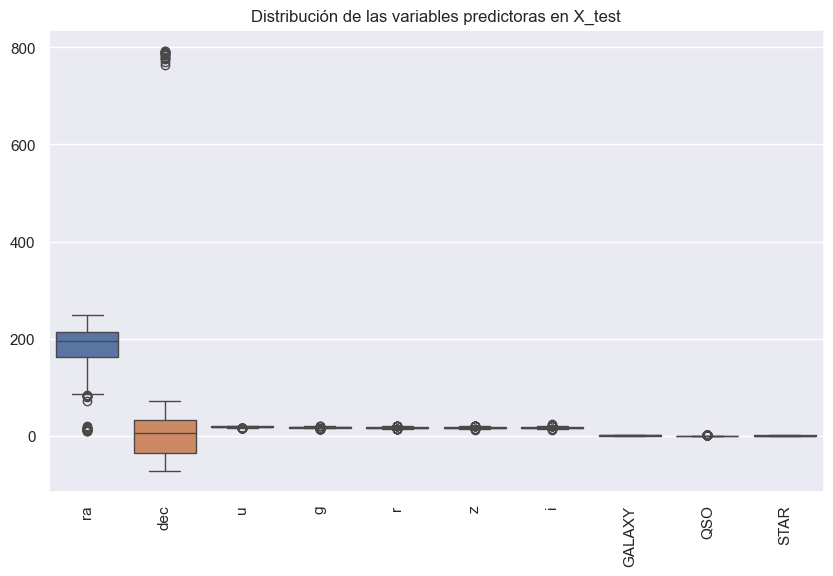

In [383]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_test)
plt.xticks(rotation=90)
plt.title("Distribuci√≥n de las variables predictoras en X_test")
plt.show()


In [384]:
import scipy.stats as stats

corr, p_value = stats.pearsonr(data["dec"], data["redshift"])
print(f"Correlaci√≥n: {corr}, p-valor: {p_value}")


Correlaci√≥n: 0.010068028404059097, p-valor: 0.5257535210693709
